<a href="https://colab.research.google.com/github/Anderche/Predictive_Asset_Modeling_LSTM_GRU/blob/main/_Anders_Kiss_29Apr2022_FINAL_LSTM_%26_GRU_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Anders Kiss


---

The following code implementation compares LSTM (Long Short-Term Memory) and GRU (Gated Recurrent Unit) neural networks to predict the future closing price of a publically traded (NYSE) company based multivariate inputs (Open, High, and Low prices). 

All models are assessed in terms of the Root Mean Squared Error (RMSE) scores for a baseline model and optimized model (differing in terms of epochs and hidden neurons). 

After further optimization, the following implementation could theoretically be utilized for financial forecasting applications.

---

29-April-2022

---


# **Table of Contents**

* **BUSINESS UNDERSTANDING**
	- MODEL BACKGROUND
    	- LSTM
      
      - GRU

* **DATA UNDERSTANDING**
* **DATA PREPARATION**
* **MODELING**
	- LSTM only
	- GRU only
	- LSTM, then GRU
	- GRU, then LSTM
* **EVALUATION**

# **BUSINESS UNDERSTANDING**

--- 

### The objective is to build a neural network to predict the future closing price of Tesla stock. This implementation will compare **4x Models** listed below for predicting Tesla daily closing price with multivariate inputs (Open, High, and Low prices). The models will be assessed in terms of a baseline model and then evaluated in terms of number of epochs and number of hidden neurons. 

  - **LSTM (Long Short-Term Memory)** 

  - **GRU (Gated Recurrent Unit)**

  - **LSTM then GRU** _stacked model_

  - **GRU then LSTM** _stacked model_

### The model with the lowest Test-set **Root Mean Square Error (RMSE)** score will be deemed the best model and could be deployed in financial forecasting applications.

---

## **MODEL BACKGROUND**

## **Long Short-Term Memory (LSTM)**

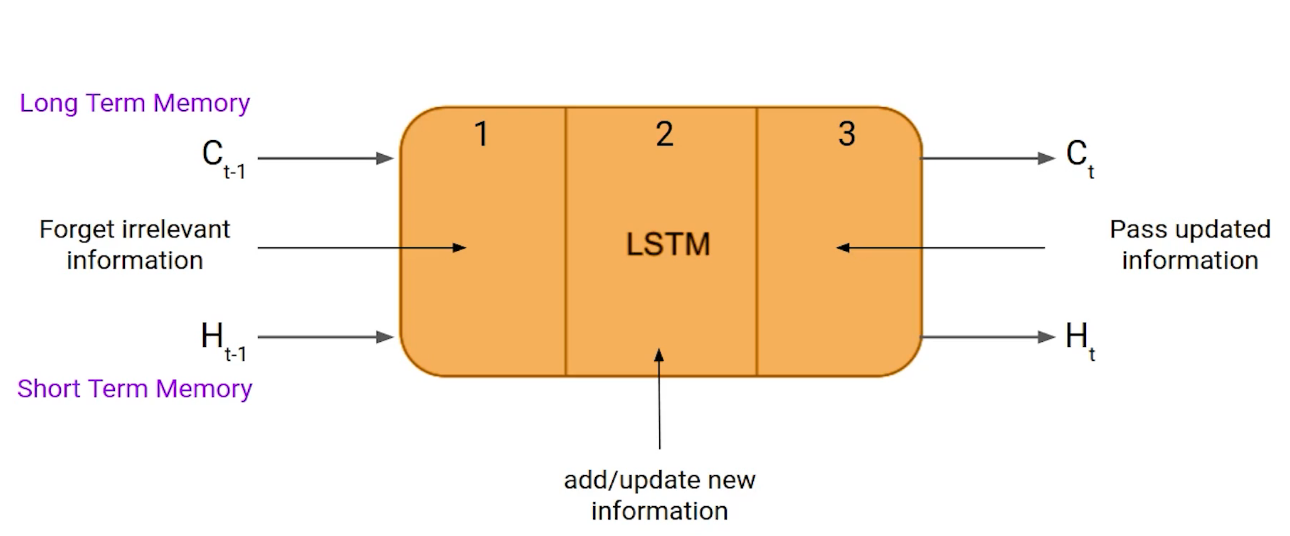

### The basic architecture LSTM unit consists of three components: 

- input gate
- output gate
- forget gate

### Input Gate
Decides information to store in long term memory from the current input and short term memory from the previous step. It filters out information from variables that are not useful.

### Forget Gate
Decides which information from long term memory should remain or be discarded by multiplying incoming long term memory by a forget vector generated by the current input and incoming short memory.

### Output Gate
The output gate will take the current input, the previous short term memory and newly computed long term memory to produce new short term memory which will be passed on to the cell in the next time step. The output of the current time step can also be drawn from this hidden state. 

---

## **Gated Recurrent Unit (GRU)**

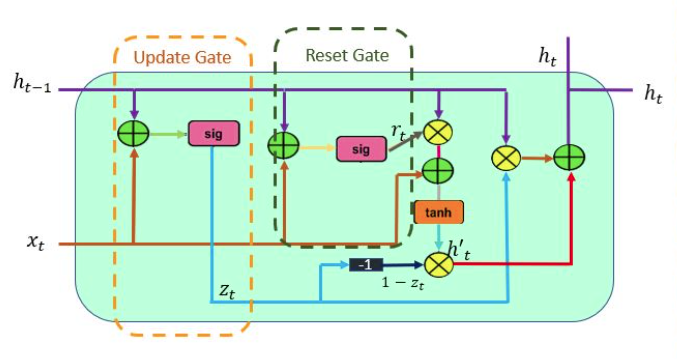

## GRU units have a two gate operating mechanisms called Update gate and Reset gate. 

### Update Gate
Determinies the amount of previous information that needs to pass along the next state. This is really powerful because the model can decide to copy all the information from the past and eliminate the risk of vanishing gradient. 

### Reset Gate
This is used from the model to decide how much of the past information is needed to neglect; in short, it decides whether the previous cell state is important or not.

---

# **DATA UNDERSTANDING**

## **INSTALLS & IMPORTS**

In [ ]:
!pip install yfinance

     |████████████████████████████████| 63 kB 1.2 MB/s 
     |████████████████████████████████| 6.4 MB 10.6 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: lxml
    Found existing installation: lxml 4.2.6
    Uninstalling lxml-4.2.6:
      Successfully uninstalled lxml-4.2.6
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires requests~=2.23.0, but you have requests 2.27.1 which is incompatible.
datascience 0.10.6 requires folium==0.2.1, but you have folium 0.8.3 which is incompatible.


In [ ]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import requests
import seaborn as sns
import math
from math import sqrt
from numpy import split, array

from tensorflow import keras
from tensorflow.keras import layers
import tensorflow as tf

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Flatten

from sklearn.preprocessing import StandardScaler, MinMaxScaler
import sklearn.metrics as metrics
from sklearn.metrics import mean_squared_error

In [ ]:
quote = yf.Ticker("TSLA")
quote = quote.history(interval='1d',start="2010-01-01",end = "2022-04-11", rounding=True)
# quote = quote.history(interval='1d',period='max', rounding=True)
quote = pd.DataFrame(quote)

In [ ]:
quote.head(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,3.80,5.00,3.51,4.78,93831500,0,0.0
2010-06-30,5.16,6.08,4.66,4.77,85935500,0,0.0
2010-07-01,5.00,5.18,4.05,4.39,41094000,0,0.0


In [ ]:
quote.tail(3)

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2022-04-06,1073.47,1079.00,1027.70,1045.76,29782800,0,0.0
2022-04-07,1052.39,1076.59,1021.54,1057.26,26482400,0,0.0
2022-04-08,1043.21,1048.44,1022.44,1025.49,18293300,0,0.0


In [ ]:
quote.shape

(2967, 7)

In [ ]:
# Check for NaN, Count NaN
print(quote.isnull().values.any())
print(quote.isnull().sum().sum())

False
0


In [ ]:
# KEEP OHLC data, DROP other columns
quote.drop(['Volume','Dividends','Stock Splits'], axis = 1,inplace=True)
quote.tail()

,Open,High,Low,Close
Date,,,,
2022-04-04,1089.38,1149.91,1072.53,1145.45
2022-04-05,1136.30,1152.87,1087.30,1091.26
2022-04-06,1073.47,1079.00,1027.70,1045.76
2022-04-07,1052.39,1076.59,1021.54,1057.26
2022-04-08,1043.21,1048.44,1022.44,1025.49


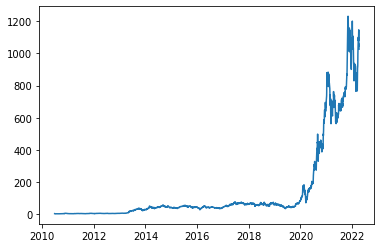

In [ ]:
plt.plot(quote['Close'])

In [ ]:
df_dates = pd.to_datetime(quote.index)
df_dates

DatetimeIndex(['2010-06-29', '2010-06-30', '2010-07-01', '2010-07-02',
               '2010-07-06', '2010-07-07', '2010-07-08', '2010-07-09',
               '2010-07-12', '2010-07-13',
               ...
               '2022-03-28', '2022-03-29', '2022-03-30', '2022-03-31',
               '2022-04-01', '2022-04-04', '2022-04-05', '2022-04-06',
               '2022-04-07', '2022-04-08'],
              dtype='datetime64[ns]', name='Date', length=2967, freq=None)

In [ ]:
# CONVERT dates from DatetimeIndex object to Series
date_range = df_dates.to_series()
print(type(date_range))
date_range[-5:]

<class 'pandas.core.series.Series'>


Date
2022-04-04   2022-04-04
2022-04-05   2022-04-05
2022-04-06   2022-04-06
2022-04-07   2022-04-07
2022-04-08   2022-04-08
Name: Date, dtype: datetime64[ns]

In [ ]:
date_range.shape

(2967,)

In [ ]:
# SCALE data

# for multivariate example
cols = quote.columns
x = quote.values #returns a numpy array

# MINMAX Scaler
min_max_scaler = MinMaxScaler()
scaled_data = min_max_scaler.fit_transform(quote)
scaled_data

# Standard Scaler
# stnd_scaler = StandardScaler()
# scaled_data = stnd_scaler.fit_transform(quote)
# scaled_data

array([[4.62970484e-04, 1.34660044e-03, 4.20098847e-04, 1.32056246e-03],
       [1.56760181e-03, 2.21745581e-03, 1.36738056e-03, 1.31241084e-03],
       [1.43764519e-03, 1.49174300e-03, 8.64909390e-04, 1.00264928e-03],
       ...,
       [8.69279878e-01, 8.67363889e-01, 8.44069193e-01, 8.49887915e-01],
       [8.52158092e-01, 8.65420591e-01, 8.38995058e-01, 8.59262278e-01],
       [8.44701831e-01, 8.42721907e-01, 8.39736409e-01, 8.33364581e-01]])

In [ ]:
# cols = ndx.columns
quote_df = pd.DataFrame(scaled_data)
quote_df.columns = cols
quote_df.index = date_range
quote_df

,Open,High,Low,Close
Date,,,,
2010-06-29,0.000463,0.001347,0.000420,0.001321
2010-06-30,0.001568,0.002217,0.001367,0.001312
2010-07-01,0.001438,0.001492,0.000865,0.001003
2010-07-02,0.001113,0.001040,0.000610,0.000554
2010-07-06,0.000625,0.000540,0.000140,0.000049
...,...,...,...,...
2022-04-04,0.882202,0.924542,0.880997,0.931151
2022-04-05,0.920312,0.926929,0.893163,0.886978
2022-04-06,0.869280,0.867364,0.844069,0.849888


In [ ]:
# VERIFY data shape
quote_df.shape

(2967, 4)

# **DATA PREPARATION**

In [ ]:
# models need data in the form [sample, time steps, features]

samples = 10 # samples/rows
steps = 1 # timesteps
X = []
Y = []
for i in range(quote_df.shape[0] - samples):
    # ENSURE INDEX RANGE for X matches input range 
    # use Open,High,Low to predict Close
    X.append(quote_df.iloc[i:i+samples, 0:3].values) # Independent Samples
    Y.append(quote_df.iloc[i+samples, 3:].values) # Dependent Samples
print('Training Data length:',len(X[0:1][0]),'\n', X[0:1])
print('\nTesting Data length:', len(Y[0:1]),'\n', Y[0:1])

Training Data length: 10 
 [array([[4.62970484e-04, 1.34660044e-03, 4.20098847e-04],
       [1.56760181e-03, 2.21745581e-03, 1.36738056e-03],
       [1.43764519e-03, 1.49174300e-03, 8.64909390e-04],
       [1.11275362e-03, 1.04018836e-03, 6.09555189e-04],
       [6.25416267e-04, 5.40252871e-04, 1.40032949e-04],
       [4.06114459e-05, 0.00000000e+00, 0.00000000e+00],
       [0.00000000e+00, 1.37079087e-04, 9.06095552e-05],
       [2.35546386e-04, 2.01586892e-04, 2.55354201e-04],
       [2.92402411e-04, 2.25777319e-04, 3.29489292e-04],
       [2.03057230e-04, 3.22539027e-04, 3.13014827e-04]])]

Testing Data length: 1 
 [array([0.00066028])]


In [ ]:
type(X)

list

In [ ]:
# Convert data from list to array for modeling
print("Original datatype for X is:\n", type(X))
print("\n- - - - - - - - - - - - - - - - - - - - -\n")
X = np.array(X)
Y = np.array(Y)
print("Converted datatype for X is:\n", type(X))
print('\nX Shape: ', X.shape, '\nY Shape: ', Y.shape)

Original datatype for X is:
 <class 'list'>

- - - - - - - - - - - - - - - - - - - - -

Converted datatype for X is:
 <class 'numpy.ndarray'>

X Shape:  (2957, 10, 3) 
Y Shape:  (2957, 1)


In [ ]:
# ESTABLISH training and testing sets
split_data = round(0.7 * X.shape[0])
trainX, trainY = X[:split_data], Y[:split_data]
testX, testY =  X[split_data:], Y[split_data:]
print('Train Set (input and output arrays):\n',trainX.shape, trainY.shape,'\nTest Set (input and output arrays):\n',testX.shape, testY.shape)

Train Set (input and output arrays):
 (2070, 10, 3) (2070, 1) 
Test Set (input and output arrays):
 (887, 10, 3) (887, 1)


# **MODELING**

### **4x MODELS**

- **LSTM only**
- **GRU only**
- **LSTM (first hidden layer) & GRU (second hidden layer)**
- **GRU (first hidden layer) & LSTM (second hidden layer)** 

# **1 ] LSTM only**

## LSTM only - Baseline Model

In [ ]:
# VERIFY that the same train/test sets are used
# Reshaped data
print('X Shape: ', X.shape, '\nY Shape: ', Y.shape)

X Shape:  (2957, 10, 3) 
Y Shape:  (2957, 1)


In [ ]:
# ESTABLISH training and testing sets
print("\n# # # SPLIT DATASETS: # # #\n")
print('Train Set Input:',trainX.shape,'; Train Set Output:', trainY.shape,'\nTest Set Input:',testX.shape,'; Test Set Output:', testY.shape)


# # # SPLIT DATASETS: # # #

Train Set Input: (2070, 10, 3) ; Train Set Output: (2070, 1) 
Test Set Input: (887, 10, 3) ; Test Set Output: (887, 1)


In [ ]:
# BUILD the LSTM
model = keras.Sequential()

# model.add(layers.LSTM(50,
#                      activation = "relu",
#                      input_shape=(trainX.shape[1], trainX.shape[2])))

model.add(layers.LSTM(50,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     input_shape=(trainX.shape[1], trainX.shape[2])))

# Add a Dense layer with 1 units
model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics='MeanSquaredError')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10800     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,851
Trainable params: 10,851
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX,
                    trainY,
                    shuffle = False, 
                    epochs=50,
                    batch_size=15,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
111/111 [==============================] - 4s 12ms/step - loss: 2.9749e-05 - mean_squared_error: 2.9749e-05 - val_loss: 1.8965e-04 - val_mean_squared_error: 1.8965e-04
Epoch 2/50
111/111 [==============================] - 1s 7ms/step - loss: 3.6615e-05 - mean_squared_error: 3.6615e-05 - val_loss: 1.2274e-04 - val_mean_squared_error: 1.2274e-04
Epoch 3/50
111/111 [==============================] - 1s 8ms/step - loss: 3.4306e-05 - mean_squared_error: 3.4306e-05 - val_loss: 1.3272e-04 - val_mean_squared_error: 1.3272e-04
Epoch 4/50
111/111 [==============================] - 1s 8ms/step - loss: 3.1465e-05 - mean_squared_error: 3.1465e-05 - val_loss: 1.2536e-04 - val_mean_squared_error: 1.2536e-04
Epoch 5/50
111/111 [==============================] - 1s 8ms/step - loss: 2.9721e-05 - mean_squared_error: 2.9721e-05 - val_loss: 1.2296e-04 - val_mean_squared_error: 1.2296e-04
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 2.8065e-05 - mean_squared_error: 2.

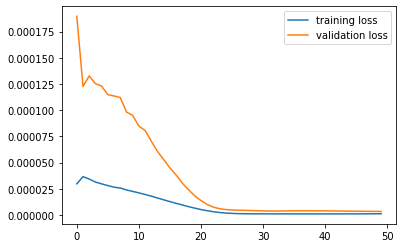

In [ ]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()

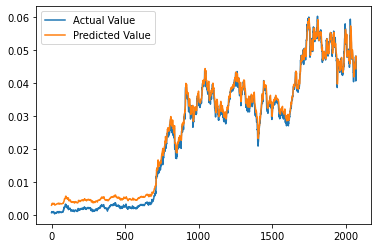

In [ ]:
# This is a one step forecast (based on how we constructed our model)
y_pred_train = model.predict(trainX)
plt.plot(trainY, label = 'Actual Value')
plt.plot(y_pred_train, label = 'Predicted Value')
plt.legend()

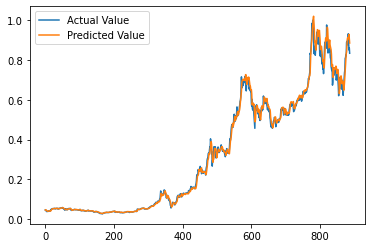

In [ ]:
# This is a one step forecast (based on how we constructed our model)
y_pred = model.predict(testX)
plt.plot(testY, label = 'Actual Value')
plt.plot(y_pred, label = 'Predicted Value')
plt.legend()

In [ ]:
# Measure RMSE error. RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_pred_train,trainY))
print("Train RMSE:\n{}".format(score))
# Measure RMSE error. RMSE is common for regression.
score = np.sqrt(metrics.mean_squared_error(y_pred,testY))
print("\nTest RMSE:\n{}".format(score))

Train RMSE:
0.001971465371242007

Test RMSE:
0.022337896487189365


In [ ]:
# MAKE FORECAST PREDICTION
forecast = model.predict(X[-samples:])
print(len(forecast))

# MAKE COPIES OF PREDICTED VALUE IN ORDER TO MATCH THE EXPECTED SHAPE WHEN INVERSING
forecast_copies = np.repeat(forecast, quote_df.shape[1], axis=-1)
print(forecast_copies)

10
[[0.83974475 0.83974475 0.83974475 0.83974475]
 [0.87313896 0.87313896 0.87313896 0.87313896]
 [0.9011731  0.9011731  0.9011731  0.9011731 ]
 [0.91163296 0.91163296 0.91163296 0.91163296]
 [0.9124022  0.9124022  0.9124022  0.9124022 ]
 [0.90614253 0.90614253 0.90614253 0.90614253]
 [0.91390324 0.91390324 0.91390324 0.91390324]
 [0.92859125 0.92859125 0.92859125 0.92859125]
 [0.9026317  0.9026317  0.9026317  0.9026317 ]
 [0.88467646 0.88467646 0.88467646 0.88467646]]


In [ ]:
# INVERSE SCALER
# forecast_scaled = stnd_scaler.inverse_transform(prediction_copies)[:,0]
forecast_scaled = min_max_scaler.inverse_transform(forecast_copies)[:,0]
print(len(forecast_scaled))
forecast_scaled[-5:]

10


array([1118.8546, 1128.4094, 1146.4929, 1114.5321, 1092.4259],
      dtype=float32)

In [ ]:
# INVERSE testY data for comparison of 
copies_test = np.repeat(testY, quote_df.shape[1], axis=-1)
print(copies_test)

# MINMAX SCALER on testY
# forecast_scaled_testY = stnd_scaler.inverse_transform(copies_test)[:,0]
scaled_testY = min_max_scaler.inverse_transform(copies_test)[:,0]
print(len(scaled_testY))
scaled_testY[-5:]

[[0.04649684 0.04649684 0.04649684 0.04649684]
 [0.04548604 0.04548604 0.04548604 0.04548604]
 [0.04337477 0.04337477 0.04337477 0.04337477]
 ...
 [0.84988792 0.84988792 0.84988792 0.84988792]
 [0.85926228 0.85926228 0.85926228 0.85926228]
 [0.83336458 0.83336458 0.83336458 0.83336458]]
887


array([1149.64500077, 1095.2593116 , 1049.59500346, 1061.13653189,
       1029.25180509])

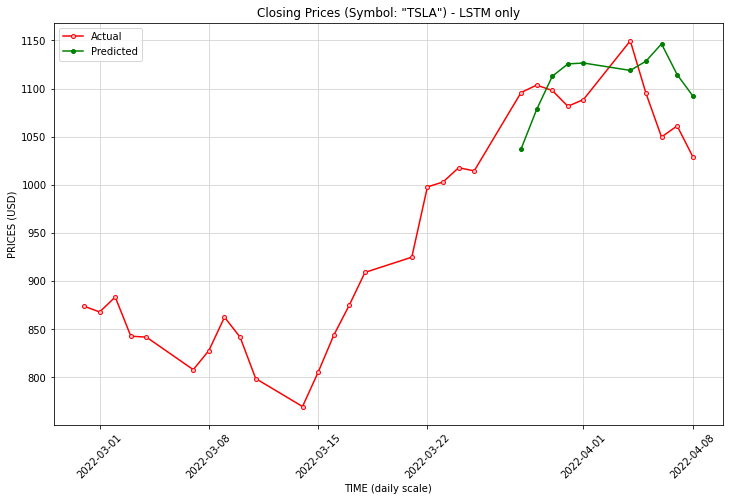

In [ ]:
plt.figure(figsize=(12,7.4))
plt.plot(quote.index[-30:], scaled_testY[-30:], marker='.', markerfacecolor='pink',markersize=8, color='red', label='Actual')
plt.plot(quote.index[-10:], forecast_scaled, marker='.', markerfacecolor='green', markersize=8, color='green', label='Predicted')
plt.title('Closing Prices (Symbol: "TSLA") - LSTM only')
plt.xlabel('TIME (daily scale)')
plt.ylabel('PRICES (USD)')
plt.xticks(rotation=45)
plt.grid(True, color='lightgrey')
plt.legend()
plt.show()

## LSTM only - Epoch for loop

In [ ]:
def automated_lstm(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse): 
  model = keras.Sequential()
  model.add(layers.LSTM(n_neurons,
                      activation = "tanh",
                      recurrent_activation = "sigmoid",
                      input_shape=(trainX.shape[1], trainX.shape[2])))

  model.add(layers.Dense(1))
  model.compile(optimizer='adam',loss='mean_squared_error',metrics='MeanSquaredError')

  # FIT THE MODEL
  model.fit(trainX,
            trainY,
            shuffle = False, # Since this is time series data
            epochs=n_epochs,
            batch_size=n_batch_size,
            validation_split=0.2,
            verbose=1) # Verbose outputs data

  # PREDICTION
  test_preds = model.predict(testX)
  # MAKE COPIES PREDICTION
  test_pred_copies = np.repeat(test_preds, quote_df.shape[1], axis=-1)
  # INVERSE SCALE PREDICTION
  inv_scaled_test_preds = min_max_scaler.inverse_transform(test_pred_copies)[:,0] 
  # MAKE COPIES ACTUAL - TEST SET
  test_actual_copies = np.repeat(testY, quote_df.shape[1], axis=-1)
  # INVERSE SCALE ACTUAL - TEST SET
  inv_scaled_testY = min_max_scaler.inverse_transform(test_actual_copies)[:,0]
  # CALCULATE PREDICTED VALUES, RMSE
  test_rmse = np.sqrt(np.mean(inv_scaled_test_preds - inv_scaled_testY) ** 2)
  print('Test RMSE: ' + str(round(test_rmse, 2)))

  # PREDICTION TRAIN SET 
  train_preds = model.predict(trainX)
  # MAKE COPIES TRAIN SET
  train_pred_copies = np.repeat(train_preds, quote_df.shape[1], axis=-1)
  # INVERSE SCALE TRAIN SET
  inv_scaled_train_preds = min_max_scaler.inverse_transform(train_pred_copies)[:,0]
  # MAKE COPIES ACTUAL - TRAIN SET
  train_actual_copies = np.repeat(trainY, quote_df.shape[1], axis=-1)
  # INVERSE SCALE ACTUAL - TRAIN SET
  inv_scaled_trainY = min_max_scaler.inverse_transform(train_actual_copies)[:,0]
  # CALCULATE PREDICTED VALUES, RMSE
  train_rmse = np.sqrt(np.mean(inv_scaled_train_preds - inv_scaled_trainY) ** 2)
  print('Train RMSE: ' + str(round(train_rmse, 2)))

  # APPEND RMSE SCORES TO EMPTY ARRAYS
  tr_rmse.append(train_rmse)
  te_rmse.append(test_rmse)

  return model, tr_rmse, te_rmse


In [ ]:
lstm_test_rmse_scores = []
lstm_train_rmse_scores = []

epochs = [80,110,140,170,200]
for i in epochs:
  # automated_lstm(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
  automated_lstm(trainX,trainY,testX,testY, 50, 10, i, lstm_train_rmse_scores, lstm_test_rmse_scores)  
  print("Iteration {} completed!".format(i))

print(len(lstm_train_rmse_scores),": ", lstm_train_rmse_scores)
print(len(lstm_test_rmse_scores),": ", lstm_test_rmse_scores)

Epoch 1/80
166/166 [==============================] - 6s 16ms/step - loss: 2.0902e-05 - mean_squared_error: 2.0902e-05 - val_loss: 1.8119e-04 - val_mean_squared_error: 1.8119e-04
Epoch 2/80
166/166 [==============================] - 2s 10ms/step - loss: 2.7602e-05 - mean_squared_error: 2.7602e-05 - val_loss: 2.0211e-04 - val_mean_squared_error: 2.0211e-04
Epoch 3/80
166/166 [==============================] - 2s 10ms/step - loss: 2.1142e-05 - mean_squared_error: 2.1142e-05 - val_loss: 1.7625e-04 - val_mean_squared_error: 1.7625e-04
Epoch 4/80
166/166 [==============================] - 2s 11ms/step - loss: 1.8887e-05 - mean_squared_error: 1.8887e-05 - val_loss: 1.5028e-04 - val_mean_squared_error: 1.5028e-04
Epoch 5/80
166/166 [==============================] - 1s 8ms/step - loss: 1.7900e-05 - mean_squared_error: 1.7900e-05 - val_loss: 1.3127e-04 - val_mean_squared_error: 1.3127e-04
Epoch 6/80
166/166 [==============================] - 1s 7ms/step - loss: 1.7395e-05 - mean_squared_error:

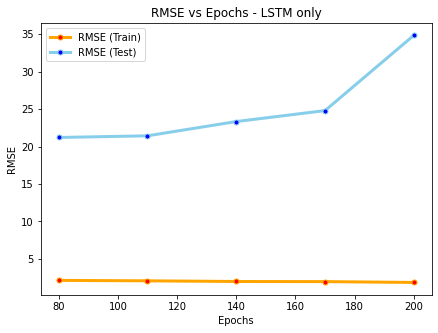

,Epochs,Train RMSE,Test RMSE
0,80,2.110784,21.207223
1,110,2.053413,21.432079
2,140,1.964784,23.335908
3,170,1.948693,24.799353
4,200,1.837275,34.854425


In [ ]:
# DATAFRAME - RMSE SCORES
model_lstm = pd.DataFrame(columns=['Epochs', 'Train RMSE', 'Test RMSE'])
model_lstm['Epochs'] = epochs
model_lstm['Train RMSE'] = lstm_train_rmse_scores
model_lstm['Test RMSE'] = lstm_test_rmse_scores

# PLOT
fig = plt.figure(figsize=(7,5))
plt.plot(model_lstm['Epochs'],model_lstm['Train RMSE'], marker='.',color='orange',markerfacecolor='red',markersize=10,linewidth=3,label="RMSE (Train)")
plt.plot(model_lstm['Epochs'],model_lstm['Test RMSE'], marker='.',color='skyblue',markerfacecolor='blue',markersize=10,linewidth=3,label="RMSE (Test)")
plt.title('RMSE vs Epochs - LSTM only')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()

# SAVE files
# fig.savefig('model_lstm_epochs.png', bbox_inches='tight', dpi=150)
# files.download('model_lstm_epochs.png')

# PLOT RMSE Results
plt.show()
model_lstm

# # SAVE model
# import pickle
# # save the model to disk
# model_lstm = 'model_lstm.sav'
# pickle.dump(model, open(model_lstm, 'wb'))

## LSTM only - Hidden Nodes for loop

In [ ]:
hn_lstm_test_rmse_scores = []
hn_lstm_train_rmse_scores = []

n_neurons = [5,15,25,35,45]
for i in n_neurons:
  # automated_lstm(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
  automated_lstm(trainX,trainY,testX,testY, i, 10, 40, hn_lstm_train_rmse_scores, hn_lstm_test_rmse_scores)  
  print("Iteration {} completed!".format(i))

print(len(hn_lstm_train_rmse_scores),": ", hn_lstm_train_rmse_scores)
print(len(hn_lstm_test_rmse_scores),": ", hn_lstm_test_rmse_scores)

Epoch 1/40
166/166 [==============================] - 6s 15ms/step - loss: 3.7343e-05 - mean_squared_error: 3.7343e-05 - val_loss: 5.0387e-04 - val_mean_squared_error: 5.0387e-04
Epoch 2/40
166/166 [==============================] - 2s 9ms/step - loss: 6.7413e-05 - mean_squared_error: 6.7413e-05 - val_loss: 3.5172e-04 - val_mean_squared_error: 3.5172e-04
Epoch 3/40
166/166 [==============================] - 1s 9ms/step - loss: 6.0359e-05 - mean_squared_error: 6.0359e-05 - val_loss: 3.0965e-04 - val_mean_squared_error: 3.0965e-04
Epoch 4/40
166/166 [==============================] - 1s 9ms/step - loss: 5.1591e-05 - mean_squared_error: 5.1591e-05 - val_loss: 2.6454e-04 - val_mean_squared_error: 2.6454e-04
Epoch 5/40
166/166 [==============================] - 1s 9ms/step - loss: 4.4560e-05 - mean_squared_error: 4.4560e-05 - val_loss: 2.3414e-04 - val_mean_squared_error: 2.3414e-04
Epoch 6/40
166/166 [==============================] - 1s 8ms/step - loss: 3.9279e-05 - mean_squared_error: 3.

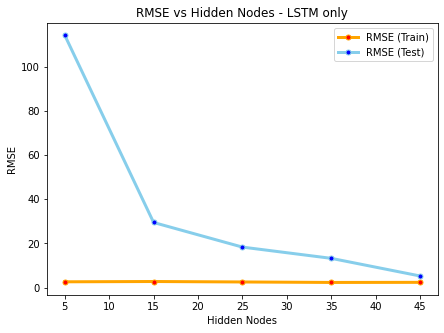

,hiddennodes,Train RMSE,Test RMSE
0,5,2.653369,114.159320
1,15,2.785393,29.489323
2,25,2.579492,18.356548
3,35,2.362637,13.274557
4,45,2.405828,5.298517


In [ ]:
# DATAFRAME - RMSE SCORES
model_lstm_hn = pd.DataFrame(columns=['hiddennodes', 'Train RMSE', 'Test RMSE'])
model_lstm_hn['hiddennodes'] = n_neurons
model_lstm_hn['Train RMSE'] = hn_lstm_train_rmse_scores
model_lstm_hn['Test RMSE'] = hn_lstm_test_rmse_scores

# PLOT
fig = plt.figure(figsize=(7,5))
plt.plot(model_lstm_hn['hiddennodes'], model_lstm_hn['Train RMSE'], marker='.',color='orange',markerfacecolor='red',markersize=10,linewidth=3,label="RMSE (Train)")
plt.plot(model_lstm_hn['hiddennodes'], model_lstm_hn['Test RMSE'], marker='.',color='skyblue',markerfacecolor='blue',markersize=10,linewidth=3,label="RMSE (Test)")
plt.title('RMSE vs Hidden Nodes - LSTM only')
plt.xlabel('Hidden Nodes')
plt.ylabel('RMSE')
plt.legend()

# SAVE files
# fig.savefig('model_lstm_hiddennodes.png', bbox_inches='tight', dpi=150)
# files.download('model_lstm_hiddennodes.png')
plt.show()
model_lstm_hn

## OPTIMIZED LSTM Model

In [ ]:
opt_lstm_test_rmse_scores = []
opt_lstm_train_rmse_scores = []
# automated_lstm(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
automated_lstm(trainX,trainY,testX,testY, 45, 40, 110, opt_lstm_train_rmse_scores, opt_lstm_test_rmse_scores)  

Epoch 1/110
42/42 [==============================] - 3s 20ms/step - loss: 2.9709e-05 - mean_squared_error: 2.9709e-05 - val_loss: 1.7942e-04 - val_mean_squared_error: 1.7942e-04
Epoch 2/110
42/42 [==============================] - 0s 8ms/step - loss: 8.3246e-05 - mean_squared_error: 8.3246e-05 - val_loss: 3.1932e-04 - val_mean_squared_error: 3.1932e-04
Epoch 3/110
42/42 [==============================] - 0s 8ms/step - loss: 1.0327e-04 - mean_squared_error: 1.0327e-04 - val_loss: 3.4669e-04 - val_mean_squared_error: 3.4669e-04
Epoch 4/110
42/42 [==============================] - 0s 8ms/step - loss: 8.1339e-05 - mean_squared_error: 8.1339e-05 - val_loss: 2.1977e-04 - val_mean_squared_error: 2.1977e-04
Epoch 5/110
42/42 [==============================] - 0s 9ms/step - loss: 1.3384e-04 - mean_squared_error: 1.3384e-04 - val_loss: 1.5852e-04 - val_mean_squared_error: 1.5852e-04
Epoch 6/110
42/42 [==============================] - 0s 9ms/step - loss: 1.1585e-04 - mean_squared_error: 1.1585e-

(<keras.engine.sequential.Sequential at 0x7f0533dbfe90>,
 [5.284730250971459],
 [199.37538505922706])

In [ ]:
print("Train RMSE:\n{}".format(opt_lstm_train_rmse_scores))
print("\nTest RMSE:\n{}".format(opt_lstm_test_rmse_scores))

Train RMSE:
[5.284730250971459]

Test RMSE:
[199.37538505922706]


# **2 ] GRU only**

## GRU only - Baseline Model

In [ ]:
# VERIFY that the same train/test sets are used
# Reshaped data
print('X Shape: ', X.shape, '\nY Shape: ', Y.shape)

# ESTABLISH training and testing sets
print("\n# # # SPLIT DATASETS: # # #\n")
print('Train Set Input:',trainX.shape,'; Train Set Output:', trainY.shape,'\nTest Set Input:',testX.shape,'; Test Set Output:', testY.shape)

X Shape:  (2957, 10, 3) 
Y Shape:  (2957, 1)

# # # SPLIT DATASETS: # # #

Train Set Input: (2070, 10, 3) ; Train Set Output: (2070, 1) 
Test Set Input: (887, 10, 3) ; Test Set Output: (887, 1)


In [ ]:
# BUILD the GRU
model = keras.Sequential()
model.add(layers.GRU(50,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     input_shape=(trainX.shape[1], trainX.shape[2])))

# model.add(layers.GRU(50,
#                      activation = "relu",
#                      input_shape=(trainX.shape[1], trainX.shape[2])))

model.add(layers.Dense(1))
model.compile(optimizer='adam',loss='mean_squared_error',metrics='MeanSquaredError')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru (GRU)                   (None, 50)                8250      
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 8,301
Trainable params: 8,301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX,
                    trainY,
                    shuffle = False, 
                    epochs=50,
                    batch_size=15,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/50
111/111 [==============================] - 5s 30ms/step - loss: 2.3027e-05 - mean_squared_error: 2.3027e-05 - val_loss: 1.6817e-04 - val_mean_squared_error: 1.6817e-04
Epoch 2/50
111/111 [==============================] - 1s 8ms/step - loss: 2.0821e-05 - mean_squared_error: 2.0821e-05 - val_loss: 1.3444e-04 - val_mean_squared_error: 1.3444e-04
Epoch 3/50
111/111 [==============================] - 1s 7ms/step - loss: 1.4939e-05 - mean_squared_error: 1.4939e-05 - val_loss: 1.0910e-04 - val_mean_squared_error: 1.0910e-04
Epoch 4/50
111/111 [==============================] - 1s 7ms/step - loss: 1.3184e-05 - mean_squared_error: 1.3184e-05 - val_loss: 8.8247e-05 - val_mean_squared_error: 8.8247e-05
Epoch 5/50
111/111 [==============================] - 1s 7ms/step - loss: 1.2505e-05 - mean_squared_error: 1.2505e-05 - val_loss: 7.1015e-05 - val_mean_squared_error: 7.1015e-05
Epoch 6/50
111/111 [==============================] - 1s 7ms/step - loss: 1.2178e-05 - mean_squared_error: 1.

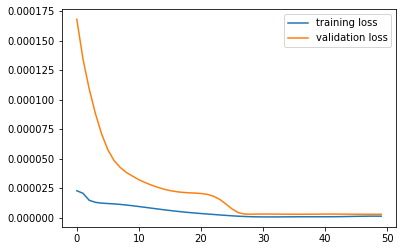

In [ ]:
# Plotting the loss iteration
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()

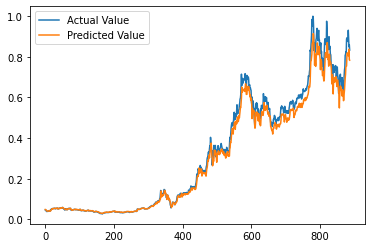

In [ ]:
# This is a one step forecast (based on how we constructed our model)
y_pred = model.predict(testX)
plt.plot(testY, label = 'Actual Value')
plt.plot(y_pred, label = 'Predicted Value')
plt.legend()

In [ ]:
# Measure RMSE error
y_pred_train = model.predict(trainX)
score = np.sqrt(metrics.mean_squared_error(y_pred_train,trainY))
print("Train RMSE:\n{}".format(score))

score = np.sqrt(metrics.mean_squared_error(y_pred,testY))
print("Test RMSE:\n{}".format(score))

Train RMSE:
0.0024869540247683497
Test RMSE:
0.03758378400948528


In [ ]:
forecast = model.predict(X[-samples:])
len(forecast)

10

In [ ]:
prediction_copies = np.repeat(forecast, quote_df.shape[1], axis=-1)
print(prediction_copies)

[[0.7546572  0.7546572  0.7546572  0.7546572 ]
 [0.8040383  0.8040383  0.8040383  0.8040383 ]
 [0.8194239  0.8194239  0.8194239  0.8194239 ]
 [0.81656814 0.81656814 0.81656814 0.81656814]
 [0.81292117 0.81292117 0.81292117 0.81292117]
 [0.80521226 0.80521226 0.80521226 0.80521226]
 [0.8235953  0.8235953  0.8235953  0.8235953 ]
 [0.8377944  0.8377944  0.8377944  0.8377944 ]
 [0.78570616 0.78570616 0.78570616 0.78570616]
 [0.7837238  0.7837238  0.7837238  0.7837238 ]]


In [ ]:
# INVERSE SCALER
# forecast_scaled = stnd_scaler.inverse_transform(prediction_copies)[:,0]
forecast_scaled = min_max_scaler.inverse_transform(prediction_copies)[:,0]
forecast_scaled[:5]
forecast_scaled[-5:]

array([ 994.59125, 1017.22406, 1034.7057 ,  970.5757 ,  968.135  ],
      dtype=float32)

In [ ]:
# INVERSE testY data for comparison of 
copies_test = np.repeat(testY, quote_df.shape[1], axis=-1)
print(copies_test)

# MINMAX SCALER on testY
# forecast_scaled_testY = stnd_scaler.inverse_transform(copies_test)[:,0]
scaled_testY = min_max_scaler.inverse_transform(copies_test)[:,0]
print(len(scaled_testY))
scaled_testY[-5:]

[[0.04649684 0.04649684 0.04649684 0.04649684]
 [0.04548604 0.04548604 0.04548604 0.04548604]
 [0.04337477 0.04337477 0.04337477 0.04337477]
 ...
 [0.84988792 0.84988792 0.84988792 0.84988792]
 [0.85926228 0.85926228 0.85926228 0.85926228]
 [0.83336458 0.83336458 0.83336458 0.83336458]]
887


array([1149.64500077, 1095.2593116 , 1049.59500346, 1061.13653189,
       1029.25180509])

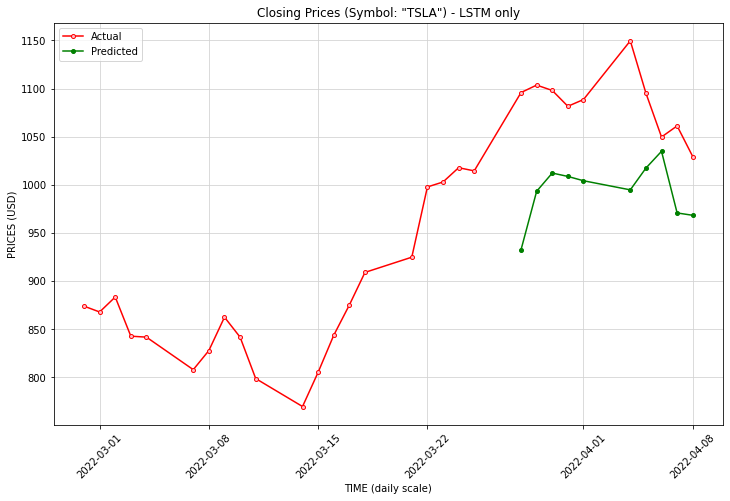

In [ ]:
plt.figure(figsize=(12,7.4))
plt.plot(quote.index[-30:], scaled_testY[-30:], marker='.', markerfacecolor='pink',markersize=8, color='red', label='Actual')
plt.plot(quote.index[-10:], forecast_scaled, marker='.', markerfacecolor='green', markersize=8, color='green', label='Predicted')
plt.title('Closing Prices (Symbol: "TSLA") - LSTM only')
plt.xlabel('TIME (daily scale)')
plt.ylabel('PRICES (USD)')
plt.xticks(rotation=45)
plt.grid(True, color='lightgrey')
plt.legend()
plt.show()

## GRU only - Epoch for loop

In [ ]:
def automated_gru(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse): 
  model_gru = keras.Sequential()
  model_gru.add(layers.GRU(n_neurons,
                      activation = "tanh",
                      recurrent_activation = "sigmoid",
                      input_shape=(trainX.shape[1], trainX.shape[2])))

  model_gru.add(layers.Dense(1))
  model_gru.compile(optimizer='adam',loss='mean_squared_error',metrics='MeanSquaredError')

  # FIT THE MODEL
  model_gru.fit(trainX,
            trainY,
            shuffle = False, # Since this is time series data
            epochs=n_epochs,
            batch_size=n_batch_size,
            validation_split=0.2,
            verbose=1) # Verbose outputs data

  # PREDICTION
  test_preds = model_gru.predict(testX)
  # MAKE COPIES PREDICTION
  test_pred_copies = np.repeat(test_preds, quote_df.shape[1], axis=-1)
  # INVERSE SCALE PREDICTION
  inv_scaled_test_preds = min_max_scaler.inverse_transform(test_pred_copies)[:,0] 
  # MAKE COPIES ACTUAL - TEST SET
  test_actual_copies = np.repeat(testY, quote_df.shape[1], axis=-1)
  # INVERSE SCALE ACTUAL - TEST SET
  inv_scaled_testY = min_max_scaler.inverse_transform(test_actual_copies)[:,0]
  # CALCULATE PREDICTED VALUES, RMSE
  test_rmse = np.sqrt(np.mean(inv_scaled_test_preds - inv_scaled_testY) ** 2)
  print('Test RMSE: ' + str(round(test_rmse, 2)))

  # PREDICTION TRAIN SET 
  train_preds = model_gru.predict(trainX)
  # MAKE COPIES TRAIN SET
  train_pred_copies = np.repeat(train_preds, quote_df.shape[1], axis=-1)
  # INVERSE SCALE TRAIN SET
  inv_scaled_train_preds = min_max_scaler.inverse_transform(train_pred_copies)[:,0]
  # MAKE COPIES ACTUAL - TRAIN SET
  train_actual_copies = np.repeat(trainY, quote_df.shape[1], axis=-1)
  # INVERSE SCALE ACTUAL - TRAIN SET
  inv_scaled_trainY = min_max_scaler.inverse_transform(train_actual_copies)[:,0]
  # CALCULATE PREDICTED VALUES, RMSE
  train_rmse = np.sqrt(np.mean(inv_scaled_train_preds - inv_scaled_trainY) ** 2)
  print('Train RMSE: ' + str(round(train_rmse, 2)))

  # APPEND RMSE SCORES TO EMPTY ARRAYS
  tr_rmse.append(train_rmse)
  te_rmse.append(test_rmse)

  return model_gru, tr_rmse, te_rmse


In [ ]:
gru_test_rmse_scores = []
gru_train_rmse_scores = []

epochs = [80,110,140,170,200]
for i in epochs:
  # automated_gru(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse
  automated_gru(trainX,trainY,testX,testY, 50, 10, i, gru_train_rmse_scores, gru_test_rmse_scores)  
  print("Iteration {} completed!".format(i))

print(len(gru_train_rmse_scores),": ", gru_train_rmse_scores)
print(len(gru_test_rmse_scores),": ", gru_test_rmse_scores)

Epoch 1/80
166/166 [==============================] - 4s 11ms/step - loss: 3.4079e-05 - mean_squared_error: 3.4079e-05 - val_loss: 2.2015e-04 - val_mean_squared_error: 2.2015e-04
Epoch 2/80
166/166 [==============================] - 1s 8ms/step - loss: 3.9985e-05 - mean_squared_error: 3.9985e-05 - val_loss: 2.4993e-04 - val_mean_squared_error: 2.4993e-04
Epoch 3/80
166/166 [==============================] - 1s 8ms/step - loss: 2.7544e-05 - mean_squared_error: 2.7544e-05 - val_loss: 2.3104e-04 - val_mean_squared_error: 2.3104e-04
Epoch 4/80
166/166 [==============================] - 1s 8ms/step - loss: 2.3007e-05 - mean_squared_error: 2.3007e-05 - val_loss: 2.0664e-04 - val_mean_squared_error: 2.0664e-04
Epoch 5/80
166/166 [==============================] - 1s 8ms/step - loss: 2.1082e-05 - mean_squared_error: 2.1082e-05 - val_loss: 1.8658e-04 - val_mean_squared_error: 1.8658e-04
Epoch 6/80
166/166 [==============================] - 1s 8ms/step - loss: 2.0256e-05 - mean_squared_error: 2.

5 :  [2.3029179120733128, 2.2746621218604326, 2.128172033798423, 2.031581571975323, 1.9737164791403343]
5 :  [30.957549208635065, 40.56982684059899, 60.17306387658043, 79.16121905234104, 72.47822439044002]


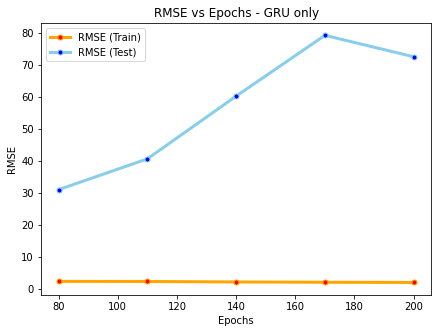

,Epochs,Train RMSE,Test RMSE
0,80,2.302918,30.957549
1,110,2.274662,40.569827
2,140,2.128172,60.173064
3,170,2.031582,79.161219
4,200,1.973716,72.478224


In [ ]:
print(len(gru_train_rmse_scores),": ", gru_train_rmse_scores)
print(len(gru_test_rmse_scores),": ", gru_test_rmse_scores)

# DATAFRAME - RMSE SCORES
model_gru = pd.DataFrame(columns=['Epochs', 'Train RMSE', 'Test RMSE'])
model_gru['Epochs'] = epochs
model_gru['Train RMSE'] = gru_train_rmse_scores
model_gru['Test RMSE'] = gru_test_rmse_scores

# PLOT
fig = plt.figure(figsize=(7,5))
plt.plot(model_gru['Epochs'], model_gru['Train RMSE'], marker='.',color='orange',markerfacecolor='red',markersize=10,linewidth=3,label="RMSE (Train)")
plt.plot(model_gru['Epochs'], model_gru['Test RMSE'], marker='.',color='skyblue',markerfacecolor='blue',markersize=10,linewidth=3,label="RMSE (Test)")
plt.title('RMSE vs Epochs - GRU only')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
# SAVE files
# fig.savefig('m01_rmse_vs_lookback.png', bbox_inches='tight', dpi=150)
# files.download('m01_rmse_vs_lookback.png')
plt.show()
model_gru

## GRU only - Hidden Nodes for loop

In [ ]:
hn_gru_test_rmse_scores = []
hn_gru_train_rmse_scores = []

n_neurons = [5,15,25,35,45]
for i in n_neurons:
  # automated_gru(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
  automated_gru(trainX,trainY,testX,testY, i, 10, 40, hn_gru_train_rmse_scores, hn_gru_test_rmse_scores)  
  print("Iteration {} completed!".format(i))

print(len(hn_gru_train_rmse_scores),": ", hn_gru_train_rmse_scores)
print(len(hn_gru_test_rmse_scores),": ", hn_gru_test_rmse_scores)

Epoch 1/40
166/166 [==============================] - 3s 9ms/step - loss: 3.1315e-05 - mean_squared_error: 3.1315e-05 - val_loss: 4.1247e-04 - val_mean_squared_error: 4.1247e-04
Epoch 2/40
166/166 [==============================] - 2s 9ms/step - loss: 3.5411e-05 - mean_squared_error: 3.5411e-05 - val_loss: 2.5562e-04 - val_mean_squared_error: 2.5562e-04
Epoch 3/40
166/166 [==============================] - 2s 11ms/step - loss: 2.3602e-05 - mean_squared_error: 2.3602e-05 - val_loss: 1.7930e-04 - val_mean_squared_error: 1.7930e-04
Epoch 4/40
166/166 [==============================] - 2s 11ms/step - loss: 1.6710e-05 - mean_squared_error: 1.6710e-05 - val_loss: 1.2847e-04 - val_mean_squared_error: 1.2847e-04
Epoch 5/40
166/166 [==============================] - 1s 7ms/step - loss: 1.1956e-05 - mean_squared_error: 1.1956e-05 - val_loss: 8.9435e-05 - val_mean_squared_error: 8.9435e-05
Epoch 6/40
166/166 [==============================] - 1s 6ms/step - loss: 8.6350e-06 - mean_squared_error: 8

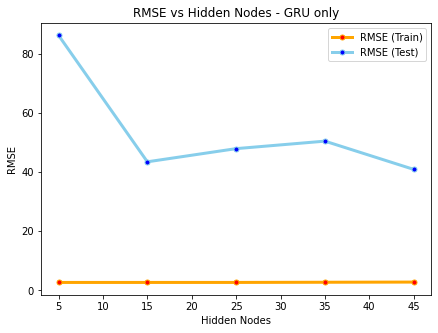

,hiddennodes,Train RMSE,Test RMSE
0,5,2.675596,86.342465
1,15,2.678435,43.524573
2,25,2.680342,47.984215
3,35,2.740029,50.521840
4,45,2.800256,40.961785


In [ ]:
# DATAFRAME - RMSE SCORES
model_gru_hn = pd.DataFrame(columns=['hiddennodes', 'Train RMSE', 'Test RMSE'])
model_gru_hn['hiddennodes'] = n_neurons
model_gru_hn['Train RMSE'] = hn_gru_train_rmse_scores
model_gru_hn['Test RMSE'] = hn_gru_test_rmse_scores

# PLOT
fig = plt.figure(figsize=(7,5))
plt.plot(model_gru_hn['hiddennodes'], model_gru_hn['Train RMSE'], marker='.',color='orange',markerfacecolor='red',markersize=10,linewidth=3,label="RMSE (Train)")
plt.plot(model_gru_hn['hiddennodes'], model_gru_hn['Test RMSE'], marker='.',color='skyblue',markerfacecolor='blue',markersize=10,linewidth=3,label="RMSE (Test)")
plt.title('RMSE vs Hidden Nodes - GRU only')
plt.xlabel('Hidden Nodes')
plt.ylabel('RMSE')
plt.legend()

# SAVE files
# fig.savefig('model_lstm_hiddennodes.png', bbox_inches='tight', dpi=150)
# files.download('model_lstm_hiddennodes.png')
plt.show()
model_gru_hn

## OPTIMIZED GRU Model

In [ ]:
opt_gru_train_rmse_score = []
opt_gru_test_rmse_scores = []
# automated_gru(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
automated_gru(trainX,trainY,testX,testY, 45, 10, 80, opt_gru_train_rmse_score, opt_gru_test_rmse_scores)  
print("Training process completed!")

Epoch 1/80
166/166 [==============================] - 5s 14ms/step - loss: 2.5480e-05 - mean_squared_error: 2.5480e-05 - val_loss: 9.9600e-05 - val_mean_squared_error: 9.9600e-05
Epoch 2/80
166/166 [==============================] - 2s 10ms/step - loss: 2.7392e-05 - mean_squared_error: 2.7392e-05 - val_loss: 5.9820e-05 - val_mean_squared_error: 5.9820e-05
Epoch 3/80
166/166 [==============================] - 2s 10ms/step - loss: 1.6666e-05 - mean_squared_error: 1.6666e-05 - val_loss: 4.0744e-05 - val_mean_squared_error: 4.0744e-05
Epoch 4/80
166/166 [==============================] - 2s 11ms/step - loss: 1.1558e-05 - mean_squared_error: 1.1558e-05 - val_loss: 2.6352e-05 - val_mean_squared_error: 2.6352e-05
Epoch 5/80
166/166 [==============================] - 2s 10ms/step - loss: 8.4586e-06 - mean_squared_error: 8.4586e-06 - val_loss: 1.7528e-05 - val_mean_squared_error: 1.7528e-05
Epoch 6/80
166/166 [==============================] - 2s 10ms/step - loss: 6.3705e-06 - mean_squared_erro

In [ ]:
print("Train RMSE:\n{}".format(opt_gru_train_rmse_score))
print("\nTest RMSE:\n{}".format(opt_gru_test_rmse_scores))

Train RMSE:
[2.3702331274927686]

Test RMSE:
[46.48540661385787]


# **3 ] LSTM, then GRU**

## LSTM, then GRU - Baseline Model

In [ ]:
# VERIFY that the same train/test sets are used
# Reshaped data
print('X Shape: ', X.shape, '\nY Shape: ', Y.shape)

# ESTABLISH training and testing sets
print("\n# # # SPLIT DATASETS: # # #\n")
print('Train Set Input:',trainX.shape,'; Train Set Output:', trainY.shape,'\nTest Set Input:',testX.shape,'; Test Set Output:', testY.shape)

X Shape:  (2957, 10, 3) 
Y Shape:  (2957, 1)

# # # SPLIT DATASETS: # # #

Train Set Input: (2070, 10, 3) ; Train Set Output: (2070, 1) 
Test Set Input: (887, 10, 3) ; Test Set Output: (887, 1)


In [ ]:
from tensorflow.keras.optimizers import Adam

model = keras.Sequential()
model.add(layers.LSTM(2,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                      return_sequences=True,
                     input_shape=(trainX.shape[1], trainX.shape[2])))

model.add(layers.GRU(10,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=False,
                     input_shape=(trainX.shape[1], trainX.shape[2])))

# model.add(LSTM(n_neurons, return_sequences=True, input_shape=(x_train.shape[1], 1)))
# model.add(LSTM(n_neurons, return_sequences=False, input_shape=(x_train.shape[1], 1)))

# Add a Dense layer with 1 units
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

model.add(layers.Dense(1))
model.compile(optimizer=opt,loss='mean_squared_error',metrics='MeanSquaredError')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 10, 2)             48        
                                                                 
 gru (GRU)                   (None, 10)                420       
                                                                 
 dense (Dense)               (None, 1)                 11        
                                                                 
Total params: 479
Trainable params: 479
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX,
                    trainY,
                    shuffle = False, 
                    epochs=40,
                    batch_size=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/40
83/83 [==============================] - 6s 21ms/step - loss: 2.6698e-05 - mean_squared_error: 2.6698e-05 - val_loss: 2.9447e-04 - val_mean_squared_error: 2.9447e-04
Epoch 2/40
83/83 [==============================] - 1s 11ms/step - loss: 6.8321e-05 - mean_squared_error: 6.8321e-05 - val_loss: 3.4188e-04 - val_mean_squared_error: 3.4188e-04
Epoch 3/40
83/83 [==============================] - 1s 10ms/step - loss: 7.2102e-05 - mean_squared_error: 7.2102e-05 - val_loss: 2.9630e-04 - val_mean_squared_error: 2.9630e-04
Epoch 4/40
83/83 [==============================] - 1s 10ms/step - loss: 8.0170e-05 - mean_squared_error: 8.0170e-05 - val_loss: 2.6532e-04 - val_mean_squared_error: 2.6532e-04
Epoch 5/40
83/83 [==============================] - 1s 10ms/step - loss: 8.6644e-05 - mean_squared_error: 8.6644e-05 - val_loss: 2.8077e-04 - val_mean_squared_error: 2.8077e-04
Epoch 6/40
83/83 [==============================] - 1s 10ms/step - loss: 8.6364e-05 - mean_squared_error: 8.6364e-0

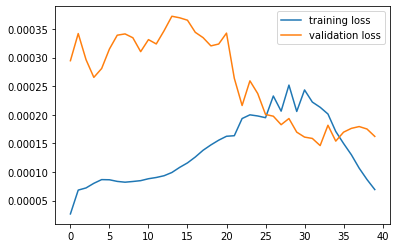

In [ ]:
# Plotting the loss iteration
y_pred_train = model.predict(trainX)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()

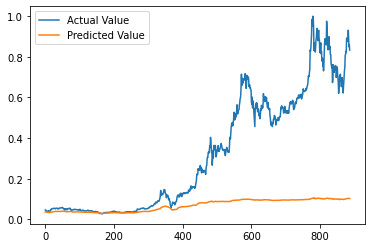

In [ ]:
# This is a one step forecast (based on how we constructed our model)
y_pred = model.predict(testX)
plt.plot(testY, label = 'Actual Value')
plt.plot(y_pred, label = 'Predicted Value')
plt.legend()

In [ ]:
# CALCULATE RMSE
score = np.sqrt(metrics.mean_squared_error(y_pred_train,trainY))
print("Train RMSE:\n{}".format(score))
score = np.sqrt(metrics.mean_squared_error(y_pred,testY))
print("Test RMSE:\n{}".format(score))

Train RMSE:
0.011695218796163144
Test RMSE:
0.3646097852676117


In [ ]:
# MAKE FORECAST PREDICTION
forecast = model.predict(X[-samples:])
print(len(forecast))

# MAKE COPIES OF PREDICTED VALUE IN ORDER TO MATCH THE EXPECTED SHAPE WHEN INVERSING
prediction_copies = np.repeat(forecast, quote_df.shape[1], axis=-1)
print(prediction_copies)

# INVERSE SCALER
# forecast_scaled = stnd_scaler.inverse_transform(prediction_copies)[:,0]
forecast_scaled = min_max_scaler.inverse_transform(prediction_copies)[:,0]
forecast_scaled[-5:]

10
[[0.1011991  0.1011991  0.1011991  0.1011991 ]
 [0.10219083 0.10219083 0.10219083 0.10219083]
 [0.10286748 0.10286748 0.10286748 0.10286748]
 [0.10251337 0.10251337 0.10251337 0.10251337]
 [0.10264537 0.10264537 0.10264537 0.10264537]
 [0.10247885 0.10247885 0.10247885 0.10247885]
 [0.10284898 0.10284898 0.10284898 0.10284898]
 [0.10356223 0.10356223 0.10356223 0.10356223]
 [0.10257578 0.10257578 0.10257578 0.10257578]
 [0.10232402 0.10232402 0.10232402 0.10232402]]


array([129.3999 , 129.8556 , 130.73375, 129.51924, 129.20927],
      dtype=float32)

In [ ]:
# INVERSE testY data 
copies_test = np.repeat(testY, quote_df.shape[1], axis=-1)
print(copies_test)

# MINMAX SCALER on testY
# forecast_scaled_testY = stnd_scaler.inverse_transform(copies_test)[:,0]
scaled_testY = min_max_scaler.inverse_transform(copies_test)[:,0]
print(len(scaled_testY))
scaled_testY[-5:]

[[0.04649684 0.04649684 0.04649684 0.04649684]
 [0.04548604 0.04548604 0.04548604 0.04548604]
 [0.04337477 0.04337477 0.04337477 0.04337477]
 ...
 [0.84988792 0.84988792 0.84988792 0.84988792]
 [0.85926228 0.85926228 0.85926228 0.85926228]
 [0.83336458 0.83336458 0.83336458 0.83336458]]
887


array([1149.64500077, 1095.2593116 , 1049.59500346, 1061.13653189,
       1029.25180509])

In [ ]:
# INVERSE testY data
prediction_copies_test = np.repeat(testY, quote_df.shape[1], axis=-1)
print(prediction_copies_test)

[[0.04649684 0.04649684 0.04649684 0.04649684]
 [0.04548604 0.04548604 0.04548604 0.04548604]
 [0.04337477 0.04337477 0.04337477 0.04337477]
 ...
 [0.84988792 0.84988792 0.84988792 0.84988792]
 [0.85926228 0.85926228 0.85926228 0.85926228]
 [0.83336458 0.83336458 0.83336458 0.83336458]]


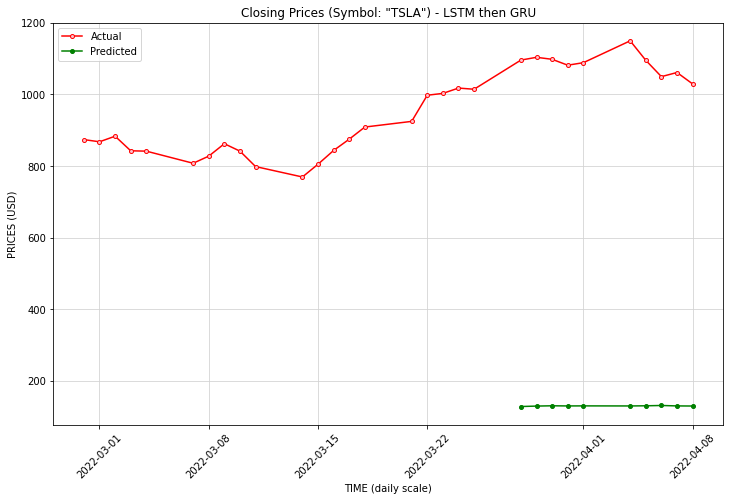

In [ ]:
plt.figure(figsize=(12,7.4))
plt.plot(quote.index[-30:], scaled_testY[-30:], marker='.', markerfacecolor='pink',markersize=8, color='red', label='Actual')
plt.plot(quote.index[-10:], forecast_scaled, marker='.', markerfacecolor='green', markersize=8, color='green', label='Predicted')
plt.title('Closing Prices (Symbol: "TSLA") - LSTM then GRU')
plt.xlabel('TIME (daily scale)')
plt.ylabel('PRICES (USD)')
plt.xticks(rotation=45)
plt.grid(True, color='lightgrey')
plt.legend()
plt.show()

## LSTM, then GRU - For Loop

In [ ]:
def automated_lstm_gru(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse): 
  model_lstm_gru = keras.Sequential()
  model_lstm_gru.add(layers.LSTM(2,
                      activation = "tanh",
                      recurrent_activation = "sigmoid",
                        return_sequences=True,
                      input_shape=(trainX.shape[1], trainX.shape[2])))

  model_lstm_gru.add(layers.GRU(10,
                      activation = "tanh",
                      recurrent_activation = "sigmoid",
                      return_sequences=False,
                      input_shape=(trainX.shape[1], trainX.shape[2])))

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  
  model_lstm_gru.add(layers.Dense(1))
  model_lstm_gru.compile(optimizer=opt,loss='mean_squared_error',metrics='MeanSquaredError')
  # model_lstm_gru.compile(optimizer='adam',loss='mean_squared_error',metrics='MeanSquaredError')

  model_lstm_gru.fit(trainX,
            trainY,
            shuffle = False, # Since this is time series data
            epochs=n_epochs,
            batch_size=n_batch_size,
            validation_split=0.2,
            verbose=1) # Verbose outputs data

  # PREDICTION
  test_preds = model_lstm_gru.predict(testX)
  # MAKE COPIES PREDICTION
  test_pred_copies = np.repeat(test_preds, quote_df.shape[1], axis=-1)
  # INVERSE SCALE PREDICTION
  inv_scaled_test_preds = min_max_scaler.inverse_transform(test_pred_copies)[:,0] 
  # MAKE COPIES ACTUAL - TEST SET
  test_actual_copies = np.repeat(testY, quote_df.shape[1], axis=-1)
  # INVERSE SCALE ACTUAL - TEST SET
  inv_scaled_testY = min_max_scaler.inverse_transform(test_actual_copies)[:,0]
  # CALCULATE PREDICTED VALUES, RMSE
  test_rmse = np.sqrt(np.mean(inv_scaled_test_preds - inv_scaled_testY) ** 2)
  print('Test RMSE: ' + str(round(test_rmse, 2)))

  # PREDICTION TRAIN SET 
  train_preds = model_lstm_gru.predict(trainX)
  # MAKE COPIES TRAIN SET
  train_pred_copies = np.repeat(train_preds, quote_df.shape[1], axis=-1)
  # INVERSE SCALE TRAIN SET
  inv_scaled_train_preds = min_max_scaler.inverse_transform(train_pred_copies)[:,0]
  # MAKE COPIES ACTUAL - TRAIN SET
  train_actual_copies = np.repeat(trainY, quote_df.shape[1], axis=-1)
  # INVERSE SCALE ACTUAL - TRAIN SET
  inv_scaled_trainY = min_max_scaler.inverse_transform(train_actual_copies)[:,0]
  # CALCULATE PREDICTED VALUES, RMSE
  train_rmse = np.sqrt(np.mean(inv_scaled_train_preds - inv_scaled_trainY) ** 2)
  print('Train RMSE: ' + str(round(train_rmse, 2)))

  # APPEND RMSE SCORES TO EMPTY ARRAYS
  tr_rmse.append(train_rmse)
  te_rmse.append(test_rmse)

  return model_lstm_gru, tr_rmse, te_rmse


In [ ]:
lstm_gru_test_rmse_scores = []
lstm_gru_train_rmse_scores = []

epochs = [80,110,140,170,200]
for i in epochs:
  # automated_lstm_gru(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
  automated_lstm_gru(trainX,trainY,testX,testY, 50, 10, i, lstm_gru_train_rmse_scores, lstm_gru_test_rmse_scores)  
  print("Iteration {} completed!".format(i))
print(len(lstm_gru_train_rmse_scores),": ", lstm_gru_train_rmse_scores)
print(len(lstm_gru_test_rmse_scores),": ", lstm_gru_test_rmse_scores)

Epoch 1/80
166/166 [==============================] - 10s 22ms/step - loss: 3.2455e-05 - mean_squared_error: 3.2455e-05 - val_loss: 3.8934e-04 - val_mean_squared_error: 3.8934e-04
Epoch 2/80
166/166 [==============================] - 2s 14ms/step - loss: 4.8520e-05 - mean_squared_error: 4.8520e-05 - val_loss: 4.0623e-04 - val_mean_squared_error: 4.0623e-04
Epoch 3/80
166/166 [==============================] - 2s 15ms/step - loss: 4.4718e-05 - mean_squared_error: 4.4718e-05 - val_loss: 3.1534e-04 - val_mean_squared_error: 3.1534e-04
Epoch 4/80
166/166 [==============================] - 2s 11ms/step - loss: 4.6281e-05 - mean_squared_error: 4.6281e-05 - val_loss: 2.7344e-04 - val_mean_squared_error: 2.7344e-04
Epoch 5/80
166/166 [==============================] - 2s 11ms/step - loss: 4.6871e-05 - mean_squared_error: 4.6871e-05 - val_loss: 2.6664e-04 - val_mean_squared_error: 2.6664e-04
Epoch 6/80
166/166 [==============================] - 2s 11ms/step - loss: 4.6929e-05 - mean_squared_err

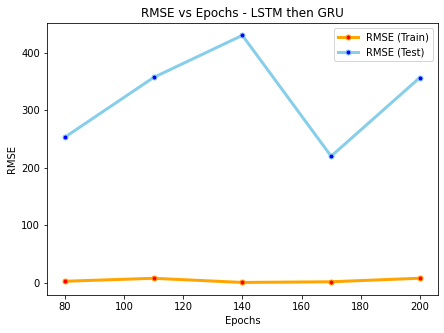

In [ ]:
# DATAFRAME - RMSE SCORES
model_lstm_gru = pd.DataFrame(columns=['Epochs', 'Train RMSE', 'Test RMSE'])
model_lstm_gru['Epochs'] = epochs
model_lstm_gru['Train RMSE'] = lstm_gru_train_rmse_scores
model_lstm_gru['Test RMSE'] = lstm_gru_test_rmse_scores

# PLOT
fig = plt.figure(figsize=(7,5))
plt.plot(model_lstm_gru['Epochs'], model_lstm_gru['Train RMSE'], marker='.',color='orange',markerfacecolor='red',markersize=10,linewidth=3,label="RMSE (Train)")
plt.plot(model_lstm_gru['Epochs'], model_lstm_gru['Test RMSE'], marker='.',color='skyblue',markerfacecolor='blue',markersize=10,linewidth=3,label="RMSE (Test)")
plt.title('RMSE vs Epochs - LSTM then GRU')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
plt.legend()
plt.show()

In [ ]:
hn_lstm_gru_test_rmse_scores = []
hn_lstm_gru_train_rmse_scores = []

n_neurons = [5,15,25,35,45]
for i in n_neurons:
  # automated_lstm_gru(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
  automated_lstm_gru(trainX,trainY,testX,testY, i, 10, 40, hn_lstm_gru_train_rmse_scores, hn_lstm_gru_test_rmse_scores)  
  print("Iteration {} completed!".format(i))

print(len(hn_lstm_gru_train_rmse_scores),": ", hn_lstm_gru_train_rmse_scores)
print(len(hn_lstm_gru_test_rmse_scores),": ", hn_lstm_gru_test_rmse_scores)

Epoch 1/40
166/166 [==============================] - 9s 17ms/step - loss: 4.3398e-05 - mean_squared_error: 4.3398e-05 - val_loss: 5.3485e-04 - val_mean_squared_error: 5.3485e-04
Epoch 2/40
166/166 [==============================] - 2s 14ms/step - loss: 5.9451e-05 - mean_squared_error: 5.9451e-05 - val_loss: 5.0617e-04 - val_mean_squared_error: 5.0617e-04
Epoch 3/40
166/166 [==============================] - 3s 18ms/step - loss: 5.3568e-05 - mean_squared_error: 5.3568e-05 - val_loss: 3.9794e-04 - val_mean_squared_error: 3.9794e-04
Epoch 4/40
166/166 [==============================] - 3s 20ms/step - loss: 5.5245e-05 - mean_squared_error: 5.5245e-05 - val_loss: 3.3671e-04 - val_mean_squared_error: 3.3671e-04
Epoch 5/40
166/166 [==============================] - 3s 19ms/step - loss: 5.5946e-05 - mean_squared_error: 5.5946e-05 - val_loss: 3.2046e-04 - val_mean_squared_error: 3.2046e-04
Epoch 6/40
166/166 [==============================] - 3s 16ms/step - loss: 5.5588e-05 - mean_squared_erro

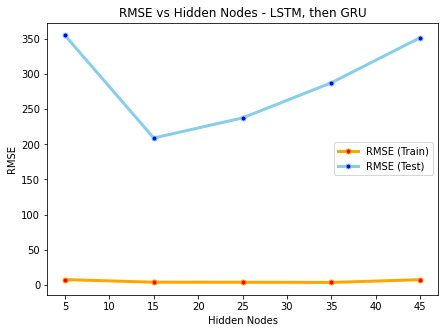

,hiddennodes,Train RMSE,Test RMSE
0,5,7.408645,355.125442
1,15,3.710971,208.956992
2,25,3.641614,237.585545
3,35,3.362511,287.612942
4,45,7.291982,351.717875


In [ ]:
# DATAFRAME - RMSE SCORES
model_lstm_gru_hn = pd.DataFrame(columns=['hiddennodes', 'Train RMSE', 'Test RMSE'])
model_lstm_gru_hn['hiddennodes'] = n_neurons
model_lstm_gru_hn['Train RMSE'] = hn_lstm_gru_train_rmse_scores
model_lstm_gru_hn['Test RMSE'] = hn_lstm_gru_test_rmse_scores

# PLOT
fig = plt.figure(figsize=(7,5))
plt.plot(model_lstm_gru_hn['hiddennodes'], model_lstm_gru_hn['Train RMSE'], marker='.',color='orange',markerfacecolor='red',markersize=10,linewidth=3,label="RMSE (Train)")
plt.plot(model_lstm_gru_hn['hiddennodes'], model_lstm_gru_hn['Test RMSE'], marker='.',color='skyblue',markerfacecolor='blue',markersize=10,linewidth=3,label="RMSE (Test)")
plt.title('RMSE vs Hidden Nodes - LSTM, then GRU')
plt.xlabel('Hidden Nodes')
plt.ylabel('RMSE')
plt.legend()

# SAVE files
# fig.savefig('model_lstm_hiddennodes.png', bbox_inches='tight', dpi=150)
# files.download('model_lstm_hiddennodes.png')
plt.show()
model_lstm_gru_hn

## OPTIMIZED MODEL: LSTM, then GRU 

In [ ]:
opt_lstm_gru_train_rmse_score = []
opt_lstm_gru_test_rmse_scores = []

# automated_lstm_gru(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
automated_lstm_gru(trainX,trainY,testX,testY, 15, 10, 170, opt_lstm_gru_train_rmse_scores, opt_lstm_gru_test_rmse_scores)  
print("Training process completed!")

Epoch 1/170
166/166 [==============================] - 12s 24ms/step - loss: 3.8181e-05 - mean_squared_error: 3.8181e-05 - val_loss: 4.2706e-04 - val_mean_squared_error: 4.2706e-04
Epoch 2/170
166/166 [==============================] - 3s 16ms/step - loss: 4.5854e-05 - mean_squared_error: 4.5854e-05 - val_loss: 4.0220e-04 - val_mean_squared_error: 4.0220e-04
Epoch 3/170
166/166 [==============================] - 2s 14ms/step - loss: 4.0978e-05 - mean_squared_error: 4.0978e-05 - val_loss: 3.4649e-04 - val_mean_squared_error: 3.4649e-04
Epoch 4/170
166/166 [==============================] - 2s 14ms/step - loss: 4.0521e-05 - mean_squared_error: 4.0521e-05 - val_loss: 2.9456e-04 - val_mean_squared_error: 2.9456e-04
Epoch 5/170
166/166 [==============================] - 2s 13ms/step - loss: 4.0686e-05 - mean_squared_error: 4.0686e-05 - val_loss: 2.5727e-04 - val_mean_squared_error: 2.5727e-04
Epoch 6/170
166/166 [==============================] - 2s 10ms/step - loss: 4.0528e-05 - mean_squar

In [ ]:
print("Train RMSE:\n{}".format(opt_lstm_gru_train_rmse_scores))
print("\nTest RMSE:\n{}".format(opt_lstm_gru_test_rmse_scores))

Train RMSE:
[4.2903959987567974, 8.001355874628393, 1.6220367552909527]

Test RMSE:
[278.7491013856428]


---

# **4 ] GRU, then LSTM**

## GRU, then LSTM - Baseline Model

In [ ]:
# VERIFY that the same train/test sets are used
# Reshaped data
print('X Shape: ', X.shape, '\nY Shape: ', Y.shape)

# ESTABLISH training and testing sets
print("\n# # # SPLIT DATASETS: # # #\n")
print('Train Set Input:',trainX.shape,'; Train Set Output:', trainY.shape,'\nTest Set Input:',testX.shape,'; Test Set Output:', testY.shape)

X Shape:  (2957, 10, 3) 
Y Shape:  (2957, 1)

# # # SPLIT DATASETS: # # #

Train Set Input: (2070, 10, 3) ; Train Set Output: (2070, 1) 
Test Set Input: (887, 10, 3) ; Test Set Output: (887, 1)


In [ ]:
model = keras.Sequential()
model.add(layers.GRU(2,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                      return_sequences=True,
                     input_shape=(trainX.shape[1], trainX.shape[2])))

model.add(layers.LSTM(2,
                     activation = "tanh",
                     recurrent_activation = "sigmoid",
                     return_sequences=False))

opt = tf.keras.optimizers.Adam(learning_rate=0.001)
# opt = Adam(learning_rate=0.01)

model.add(layers.Dense(1))
model.compile(optimizer=opt,loss='mean_squared_error',metrics='MeanSquaredError')
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 gru_8 (GRU)                 (None, 10, 2)             42        
                                                                 
 lstm (LSTM)                 (None, 2)                 40        
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 85
Trainable params: 85
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(trainX,
                    trainY,
                    shuffle = False, 
                    epochs=40,
                    batch_size=20,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/40
83/83 [==============================] - 6s 21ms/step - loss: 2.2498e-05 - mean_squared_error: 2.2498e-05 - val_loss: 3.4788e-04 - val_mean_squared_error: 3.4788e-04
Epoch 2/40
83/83 [==============================] - 1s 11ms/step - loss: 1.2026e-04 - mean_squared_error: 1.2026e-04 - val_loss: 4.0216e-04 - val_mean_squared_error: 4.0216e-04
Epoch 3/40
83/83 [==============================] - 1s 10ms/step - loss: 1.3140e-04 - mean_squared_error: 1.3140e-04 - val_loss: 3.9005e-04 - val_mean_squared_error: 3.9005e-04
Epoch 4/40
83/83 [==============================] - 1s 11ms/step - loss: 1.5041e-04 - mean_squared_error: 1.5041e-04 - val_loss: 3.1082e-04 - val_mean_squared_error: 3.1082e-04
Epoch 5/40
83/83 [==============================] - 1s 11ms/step - loss: 1.7932e-04 - mean_squared_error: 1.7932e-04 - val_loss: 2.9313e-04 - val_mean_squared_error: 2.9313e-04
Epoch 6/40
83/83 [==============================] - 1s 11ms/step - loss: 1.9427e-04 - mean_squared_error: 1.9427e-0

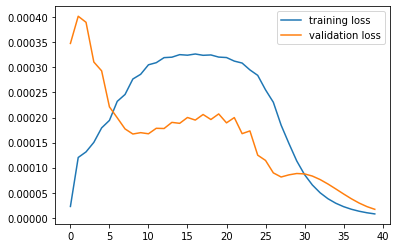

In [ ]:
y_pred_train = model.predict(trainX)
plt.plot(history.history['loss'], label = 'training loss')
plt.plot(history.history['val_loss'], label ='validation loss')
plt.legend()

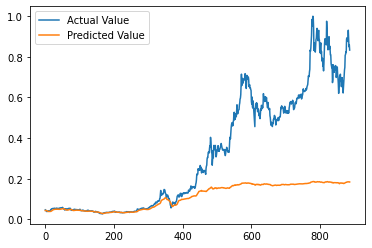

In [ ]:
y_pred = model.predict(testX)
plt.plot(testY, label = 'Actual Value')
plt.plot(y_pred, label = 'Predicted Value')
plt.legend()

In [ ]:
# CALCULATE RMSE
score = np.sqrt(metrics.mean_squared_error(y_pred_train,trainY))
print("Train RMSE:\n{}".format(score))
score = np.sqrt(metrics.mean_squared_error(y_pred,testY))
print("Test RMSE:\n{}".format(score))

Train RMSE:
0.004054700836706638
Test RMSE:
0.31325480523303845


In [ ]:
# MAKE FORECAST PREDICTION
forecast = model.predict(X[-samples:])
print(len(forecast))

# MAKE COPIES OF PREDICTED VALUE IN ORDER TO MATCH THE EXPECTED SHAPE WHEN INVERSING
prediction_copies = np.repeat(forecast, quote_df.shape[1], axis=-1)
print(prediction_copies)

# INVERSE SCALER
# forecast_scaled = stnd_scaler.inverse_transform(prediction_copies)[:,0]
forecast_scaled = min_max_scaler.inverse_transform(prediction_copies)[:,0]
forecast_scaled[-5:]

10
[[0.18249395 0.18249395 0.18249395 0.18249395]
 [0.18355455 0.18355455 0.18355455 0.18355455]
 [0.18420218 0.18420218 0.18420218 0.18420218]
 [0.18420215 0.18420215 0.18420215 0.18420215]
 [0.18419425 0.18419425 0.18419425 0.18419425]
 [0.18404852 0.18404852 0.18404852 0.18404852]
 [0.18441112 0.18441112 0.18441112 0.18441112]
 [0.1848403  0.1848403  0.1848403  0.1848403 ]
 [0.18401659 0.18401659 0.18401659 0.18401659]
 [0.18368934 0.18368934 0.18368934 0.18368934]]


array([229.82686, 230.27328, 230.80168, 229.78754, 229.38464],
      dtype=float32)

In [ ]:
# INVERSE testY data for comparison of 
copies_test = np.repeat(testY, quote_df.shape[1], axis=-1)
print(copies_test)

# MINMAX SCALER on testY
# forecast_scaled_testY = stnd_scaler.inverse_transform(copies_test)[:,0]
scaled_testY = min_max_scaler.inverse_transform(copies_test)[:,0]
print(len(scaled_testY))
scaled_testY[-5:]

[[0.04649684 0.04649684 0.04649684 0.04649684]
 [0.04548604 0.04548604 0.04548604 0.04548604]
 [0.04337477 0.04337477 0.04337477 0.04337477]
 ...
 [0.84988792 0.84988792 0.84988792 0.84988792]
 [0.85926228 0.85926228 0.85926228 0.85926228]
 [0.83336458 0.83336458 0.83336458 0.83336458]]
887


array([1149.64500077, 1095.2593116 , 1049.59500346, 1061.13653189,
       1029.25180509])

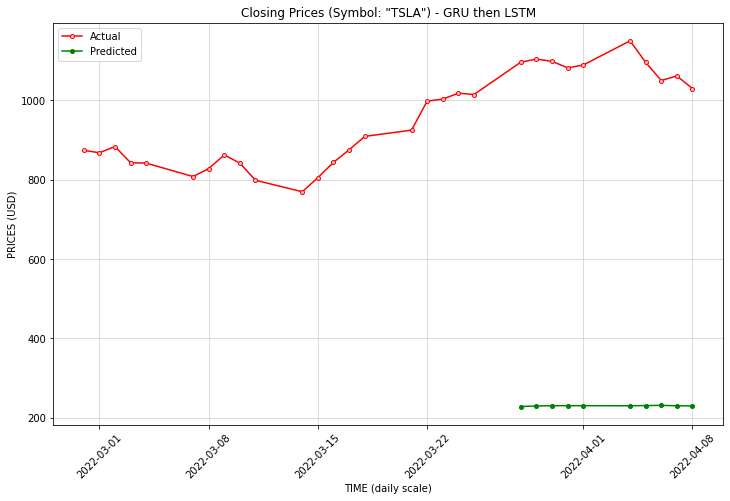

In [ ]:
plt.figure(figsize=(12,7.4))
plt.plot(quote.index[-30:], scaled_testY[-30:], marker='.', markerfacecolor='pink',markersize=8, color='red', label='Actual')
plt.plot(quote.index[-10:], forecast_scaled, marker='.', markerfacecolor='green', markersize=8, color='green', label='Predicted')
plt.title('Closing Prices (Symbol: "TSLA") - GRU then LSTM')
plt.xlabel('TIME (daily scale)')
plt.ylabel('PRICES (USD)')
plt.xticks(rotation=45)
plt.grid(True, color='lightgrey')
plt.legend()
plt.show()

## GRU, then LSTM - For Loop

In [ ]:
def automated_gru_lstm(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse): 
  model_gru_lstm = keras.Sequential()
  model_gru_lstm.add(layers.LSTM(n_neurons,
                      activation = "tanh",
                      recurrent_activation = "sigmoid",
                        return_sequences=True,
                      input_shape=(trainX.shape[1], trainX.shape[2])))

  model_gru_lstm.add(layers.GRU(n_neurons,
                      activation = "tanh",
                      recurrent_activation = "sigmoid",
                      return_sequences=False,
                      input_shape=(trainX.shape[1], trainX.shape[2])))

  opt = tf.keras.optimizers.Adam(learning_rate=0.001)
  
  model_gru_lstm.add(layers.Dense(1))
  model_gru_lstm.compile(optimizer=opt,loss='mean_squared_error',metrics='MeanSquaredError')
  # model_gru_lstm.compile(optimizer='adam',loss='mean_squared_error',metrics='MeanSquaredError')

  model_gru_lstm.fit(trainX,
            trainY,
            shuffle = False, # Since this is time series data
            epochs=n_epochs,
            batch_size=n_batch_size,
            validation_split=0.2,
            verbose=1) # Verbose outputs data

  # PREDICTION
  test_preds = model_gru_lstm.predict(testX)
  # MAKE COPIES PREDICTION
  test_pred_copies = np.repeat(test_preds, quote_df.shape[1], axis=-1)
  # INVERSE SCALE PREDICTION
  inv_scaled_test_preds = min_max_scaler.inverse_transform(test_pred_copies)[:,0] 
  # MAKE COPIES ACTUAL - TEST SET
  test_actual_copies = np.repeat(testY, quote_df.shape[1], axis=-1)
  # INVERSE SCALE ACTUAL - TEST SET
  inv_scaled_testY = min_max_scaler.inverse_transform(test_actual_copies)[:,0]
  # CALCULATE PREDICTED VALUES, RMSE
  test_rmse = np.sqrt(np.mean(inv_scaled_test_preds - inv_scaled_testY) ** 2)
  print('Test RMSE: ' + str(round(test_rmse, 2)))

  # PREDICTION TRAIN SET 
  train_preds = model_gru_lstm.predict(trainX)
  # MAKE COPIES TRAIN SET
  train_pred_copies = np.repeat(train_preds, quote_df.shape[1], axis=-1)
  # INVERSE SCALE TRAIN SET
  inv_scaled_train_preds = min_max_scaler.inverse_transform(train_pred_copies)[:,0]
  # MAKE COPIES ACTUAL - TRAIN SET
  train_actual_copies = np.repeat(trainY, quote_df.shape[1], axis=-1)
  # INVERSE SCALE ACTUAL - TRAIN SET
  inv_scaled_trainY = min_max_scaler.inverse_transform(train_actual_copies)[:,0]
  # CALCULATE PREDICTED VALUES, RMSE
  train_rmse = np.sqrt(np.mean(inv_scaled_train_preds - inv_scaled_trainY) ** 2)
  print('Train RMSE: ' + str(round(train_rmse, 2)))

  # APPEND RMSE SCORES TO EMPTY ARRAYS
  tr_rmse.append(train_rmse)
  te_rmse.append(test_rmse)

  return model_gru_lstm, tr_rmse, te_rmse


In [ ]:
gru_lstm_test_rmse_scores = []
gru_lstm_train_rmse_scores = []

epochs = [80,110,140,170,200]
for i in epochs:
  # automated_lstm_gru(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
  automated_gru_lstm(trainX,trainY,testX,testY, 50, 10, i, gru_lstm_train_rmse_scores, gru_lstm_test_rmse_scores)  
  print("Iteration {} completed!".format(i))
print(len(gru_lstm_train_rmse_scores),": ", gru_lstm_train_rmse_scores)
print(len(gru_lstm_test_rmse_scores),": ", gru_lstm_test_rmse_scores)

Epoch 1/80
166/166 [==============================] - 7s 17ms/step - loss: 3.5090e-05 - mean_squared_error: 3.5090e-05 - val_loss: 2.5765e-04 - val_mean_squared_error: 2.5765e-04
Epoch 2/80
166/166 [==============================] - 2s 12ms/step - loss: 5.3208e-05 - mean_squared_error: 5.3208e-05 - val_loss: 4.2015e-04 - val_mean_squared_error: 4.2015e-04
Epoch 3/80
166/166 [==============================] - 2s 13ms/step - loss: 4.9483e-05 - mean_squared_error: 4.9483e-05 - val_loss: 4.3930e-04 - val_mean_squared_error: 4.3930e-04
Epoch 4/80
166/166 [==============================] - 2s 13ms/step - loss: 4.4524e-05 - mean_squared_error: 4.4524e-05 - val_loss: 3.2601e-04 - val_mean_squared_error: 3.2601e-04
Epoch 5/80
166/166 [==============================] - 2s 12ms/step - loss: 5.2812e-05 - mean_squared_error: 5.2812e-05 - val_loss: 2.9343e-04 - val_mean_squared_error: 2.9343e-04
Epoch 6/80
166/166 [==============================] - 2s 12ms/step - loss: 6.0404e-05 - mean_squared_erro

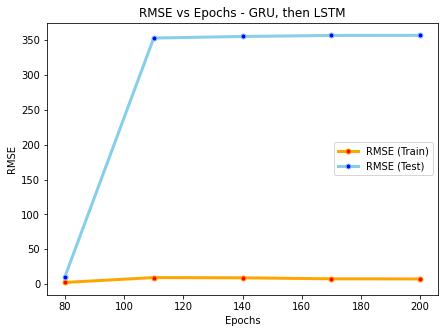

In [ ]:
# DATAFRAME - RMSE SCORES
model_gru_lstm = pd.DataFrame(columns=['Epochs', 'Train RMSE', 'Test RMSE'])
model_gru_lstm['Epochs'] = epochs
model_gru_lstm['Train RMSE'] = gru_lstm_train_rmse_scores
model_gru_lstm['Test RMSE'] = gru_lstm_test_rmse_scores

# PLOT
fig = plt.figure(figsize=(7,5))
plt.plot(model_gru_lstm['Epochs'], model_gru_lstm['Train RMSE'], marker='.',color='orange',markerfacecolor='red',markersize=10,linewidth=3,label="RMSE (Train)")
plt.plot(model_gru_lstm['Epochs'], model_gru_lstm['Test RMSE'], marker='.',color='skyblue',markerfacecolor='blue',markersize=10,linewidth=3,label="RMSE (Test)")
plt.title('RMSE vs Epochs - GRU, then LSTM')
plt.xlabel('Epochs')
plt.ylabel('RMSE')
# SAVE files
# fig.savefig('m01_rmse_vs_lookback.png', bbox_inches='tight', dpi=150)
# files.download('m01_rmse_vs_lookback.png')
plt.legend()
plt.show()

## GRU, then LSTM - Hidden Neuron for loop

In [ ]:
hn_gru_lstm_test_rmse_scores = []
hn_gru_lstm_train_rmse_scores = []

n_neurons = [5,15,25,35,45]
for i in n_neurons:
  # automated_lstm(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
  automated_gru_lstm(trainX,trainY,testX,testY, i, 10, 40, hn_gru_lstm_train_rmse_scores, hn_gru_lstm_test_rmse_scores)  
  print("Iteration {} completed!".format(i))

print(len(hn_gru_lstm_train_rmse_scores),": ", hn_gru_lstm_train_rmse_scores)
print(len(hn_gru_lstm_test_rmse_scores),": ", hn_gru_lstm_test_rmse_scores)

Epoch 1/40
166/166 [==============================] - 6s 16ms/step - loss: 9.0035e-06 - mean_squared_error: 9.0035e-06 - val_loss: 4.8089e-05 - val_mean_squared_error: 4.8089e-05
Epoch 2/40
166/166 [==============================] - 2s 11ms/step - loss: 1.9029e-05 - mean_squared_error: 1.9029e-05 - val_loss: 6.0466e-05 - val_mean_squared_error: 6.0466e-05
Epoch 3/40
166/166 [==============================] - 2s 11ms/step - loss: 1.8613e-05 - mean_squared_error: 1.8613e-05 - val_loss: 7.7666e-05 - val_mean_squared_error: 7.7666e-05
Epoch 4/40
166/166 [==============================] - 2s 11ms/step - loss: 1.7644e-05 - mean_squared_error: 1.7644e-05 - val_loss: 8.6266e-05 - val_mean_squared_error: 8.6266e-05
Epoch 5/40
166/166 [==============================] - 2s 11ms/step - loss: 1.6589e-05 - mean_squared_error: 1.6589e-05 - val_loss: 8.9313e-05 - val_mean_squared_error: 8.9313e-05
Epoch 6/40
166/166 [==============================] - 2s 11ms/step - loss: 1.5595e-05 - mean_squared_erro

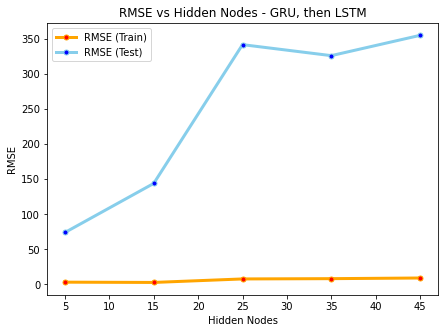

,hiddennodes,Train RMSE,Test RMSE
0,5,3.318301,74.109266
1,15,2.916698,144.020708
2,25,7.914449,341.778224
3,35,8.314696,326.114876
4,45,9.245614,355.027262


In [ ]:
# DATAFRAME - RMSE SCORES
model_lstm_hn = pd.DataFrame(columns=['hiddennodes', 'Train RMSE', 'Test RMSE'])
model_lstm_hn['hiddennodes'] = n_neurons
model_lstm_hn['Train RMSE'] = hn_gru_lstm_train_rmse_scores
model_lstm_hn['Test RMSE'] = hn_gru_lstm_test_rmse_scores

# PLOT
fig = plt.figure(figsize=(7,5))
plt.plot(model_lstm_hn['hiddennodes'], model_lstm_hn['Train RMSE'], marker='.',color='orange',markerfacecolor='red',markersize=10,linewidth=3,label="RMSE (Train)")
plt.plot(model_lstm_hn['hiddennodes'], model_lstm_hn['Test RMSE'], marker='.',color='skyblue',markerfacecolor='blue',markersize=10,linewidth=3,label="RMSE (Test)")
plt.title('RMSE vs Hidden Nodes - GRU, then LSTM')
plt.xlabel('Hidden Nodes')
plt.ylabel('RMSE')
plt.legend()

# SAVE files
# fig.savefig('model_lstm_hiddennodes.png', bbox_inches='tight', dpi=150)
# files.download('model_lstm_hiddennodes.png')
plt.show()
model_lstm_hn

## OPTIMIZED - GRU, then LSTM

In [ ]:
opt_gru_lstm_train_rmse_scores = []
opt_gru_lstm_test_rmse_scores = []

# automated_gru_lstm(trainX,trainY,testX,testY,n_neurons,n_batch_size,n_epochs,tr_rmse,te_rmse)
automated_gru_lstm(trainX,trainY,testX,testY, 5, 10, 80, hn_gru_lstm_train_rmse_scores, hn_gru_lstm_test_rmse_scores)  
print("Training process completed!")

Epoch 1/80
166/166 [==============================] - 11s 26ms/step - loss: 1.5145e-05 - mean_squared_error: 1.5145e-05 - val_loss: 1.7333e-04 - val_mean_squared_error: 1.7333e-04
Epoch 2/80
166/166 [==============================] - 3s 18ms/step - loss: 2.4853e-05 - mean_squared_error: 2.4853e-05 - val_loss: 2.1331e-04 - val_mean_squared_error: 2.1331e-04
Epoch 3/80
166/166 [==============================] - 3s 17ms/step - loss: 2.3288e-05 - mean_squared_error: 2.3288e-05 - val_loss: 2.0303e-04 - val_mean_squared_error: 2.0303e-04
Epoch 4/80
166/166 [==============================] - 2s 12ms/step - loss: 2.4124e-05 - mean_squared_error: 2.4124e-05 - val_loss: 1.8835e-04 - val_mean_squared_error: 1.8835e-04
Epoch 5/80
166/166 [==============================] - 2s 12ms/step - loss: 2.5212e-05 - mean_squared_error: 2.5212e-05 - val_loss: 1.7215e-04 - val_mean_squared_error: 1.7215e-04
Epoch 6/80
166/166 [==============================] - 2s 12ms/step - loss: 2.6653e-05 - mean_squared_err

In [ ]:
y_pred_train = model.predict(trainX)
y_pred = model.predict(testX)

score = np.sqrt(metrics.mean_squared_error(y_pred_train,trainY))
print("Train RMSE:\n{}".format(score))

score = np.sqrt(metrics.mean_squared_error(y_pred,testY))
print("\nTest RMSE:\n{}".format(score))

Train RMSE:
0.004054700836706638

Test RMSE:
0.31325480523303845


---

# **EVALUATION**

### Based on the fact that it provided the lowest RMSE score, the **LSTM-only model** and the **GRU-only model** performed the best in terms of predicting the next day's Tesla 'Closing Price', with the **LSTM-only model** slightly outperforming based on the baseline hyperparameters used. 

### All of the models were assessed first with a baseline model, and subsequently optimized in terms of number of **epochs**, and number of **hidden layer neurons**. This was accomplished with two for-loops; the following values were iterated over, respectively.

  - **epochs** = [80,110,140,170,200]

  - **n_neurons** = [5,15,25,35,45]

---

### After evaluating the 4x different models, the best performing model was the **LSTM-only** model.

---

## **LSTM only**

BASELINE MODEL

Train RMSE:
0.0020697530927590913

Test RMSE:
0.02065330768606446

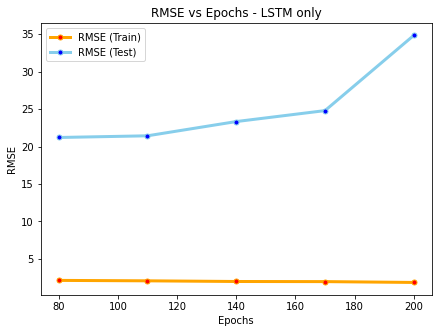

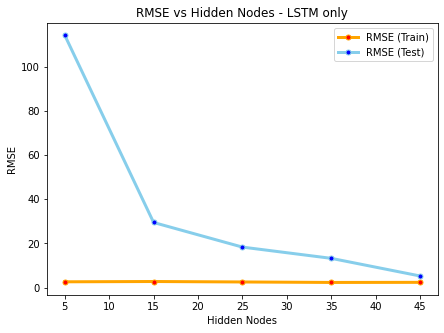

OPTIMIZED MODEL

Train RMSE:
5.284730250971459

Test RMSE:
199.37538505922706


The LSTM only model seems to learn the dataset the best at 110 epochs, whereby overfitting occurs. This is evidenced by the RMSE scores for Test set (“unseen”) data diverging from the RMSE scores for the Train set data. 

Similarly, the LSTM only model seems to learn the dataset the best at 45 hidden neurons. A neural network with more than 45 hidden layer nodes could produce overfitting.

The baseline model seems to have outperformed the optimized model, which demonstrates that the hyperparameter selection process is more nuanced than expected. More specifically, various permutations of hyperparameters could have been evaluated instead of adding one optimized hyperparameter after another (in our case, adding an optimized number of epochs, then an optimized number of hidden nodes).



## **GRU only**

BASELINE MODEL

Train RMSE:
0.0024898920015468265

Test RMSE:
0.04612300038480547

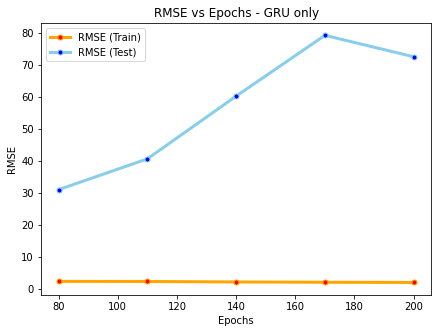

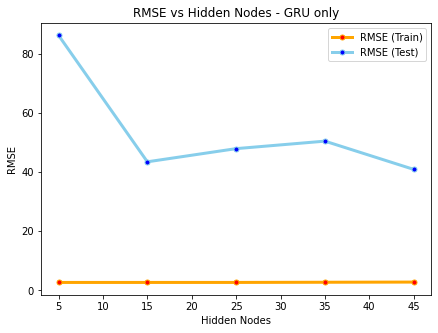

OPTIMIZED MODEL

Train RMSE:
2.3702331274927686

Test RMSE:
46.48540661385787


The GRU only model seems to learn the dataset the best at 80 epochs before underfitting occurs. This is evidenced by the RMSE scores for Test set (“unseen”) data diverging from the RMSE scores for the Train set data. 

Similarly, the GRU only model seems to learn the dataset the best at 45 hidden neurons.

When these values were added to the optimized model, a similar range of RMSE scores were observed. This signals that the optimized hyperparameters did not show a significant improvement over the baseline GRU only model.


## **LSTM, then GRU**

BASELINE

Train RMSE:
0.011695218796163144

Test RMSE:
0.3646097852676117

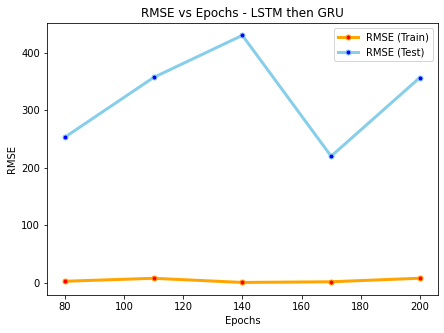

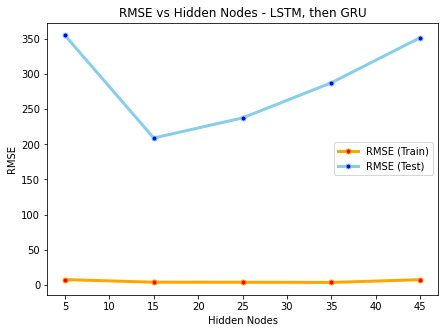

OPTIMIZED MODEL - RMSE SCORES

Train RMSE: 1.62

Test RMSE: 278.75

Since the optimized model had a more divergent Test RMSE as opposed to the baseline Test RMSE, the optimization strategy was not ideal and could not improve the baseline model. However, since the baseline model for the LSTM, then GRU model underperformed both the LSTM-only and GRU-only models, this stacked model approach was overly complex for the dataset.

## **GRU, then LSTM**

BASELINE

Train RMSE:
0.004054700836706638

Test RMSE:
0.31325480523303845


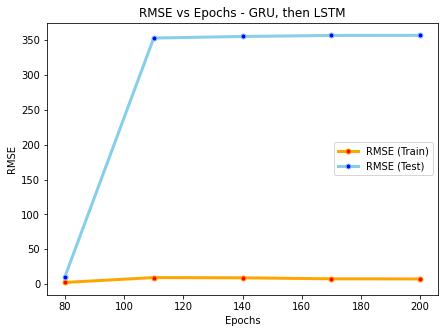

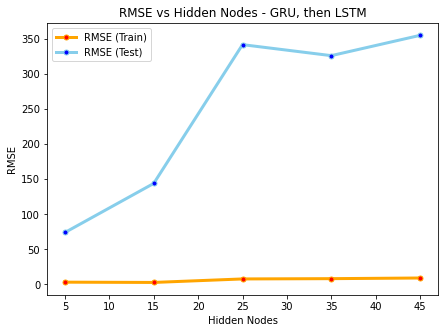

OPTIMIZED MODEL

Train RMSE:
0.004054700836706638

Test RMSE:
0.31325480523303845



The GRU, then LSTM model seems to learn the dataset the best at 110 epochs, whereby overfitting occurs. This is evidenced by the RMSE scores for Test set (“unseen”) data diverging from the RMSE scores for the Train set data. 

Similarly, the GRU, then LSTM model seems to learn the dataset the best at 45 hidden neurons. A neural network with more than 45 hidden layer nodes could produce overfitting.



### The aforementioned **LSTM model** could be theoretically deployed in a financial analysis or investment application. Ideally, it would be used in tandem with other models with the maximum possible timeframe so that the model learns from the most data. The model could be used for predicting the next time sequence for assets other than Tesla's Closing Price, or stocks (e.g. for commodities). More specifically, this model could be used to predict the future timestep (next day) for any asset that can be obtained from the _yfinance_ Python library as long as it has high, open, low, and close price data. 

### REFERENCE 1:
https://github.com/SpencerPao/Data_Science/blob/main/GRU/GRU.ipynb

### REFERENCE 2:
https://github.com/bnsreenu/python_for_microscopists/blob/master/181_multivariate_timeseries_LSTM_GE.py

### REFERENCE 3:
https://analyticsindiamag.com/lstm-vs-gru-in-recurrent-neural-network-a-comparative-study/